In [47]:
import pandas as pd
import numpy as np
from technical_indicators_lib import *
import yfinance as yf
import math
from ta.momentum import WilliamsRIndicator
import matplotlib.pyplot as plt

In [285]:
# Simple Average Movement 
def get_smas(stocks, names, period):
    sma = SMA()
    for stock in stocks:
        stock = sma.get_value_df(stock, period)
    #print(stocks)
    add_buy_and_sell_sma(stocks)
    print_smas(stocks, names)
    
def add_buy_and_sell_sma(stocks):
    for stock in stocks:
        trend = []
        helper_buy = []
        helper_sell = []
        flag = 0
        for day in stock.index:
            if math.isnan(stock["SMA"][day]): 
                helper_buy.append(np.nan)
                helper_sell.append(np.nan)
                trend.append("hold")
            else:    
                if stock["close"][day] > stock["SMA"][day]:
                    if flag == 0:
                        helper_buy.append(stock["close"][day])
                        helper_sell.append(np.nan)
                        trend.append("buy")
                        flag = 1
                    else:
                        helper_buy.append(np.nan)
                        helper_sell.append(np.nan)
                        trend.append("hold")
                if stock["close"][day] < stock["SMA"][day]:
                    if flag == 1:
                        helper_sell.append(stock["close"][day])
                        helper_buy.append(np.nan)
                        flag = 0
                        trend.append("sell")
                    else:
                        helper_sell.append(np.nan)
                        helper_buy.append(np.nan)
                        trend.append("sell")
        stock["sma_buy"] = helper_buy
        stock["sma_sell"] = helper_sell
        stock["sma_trend"] = trend
        
def print_smas(stocks, names):
    counter = 0
    for stock in stocks:
        fig, ax = plt.subplots(figsize=(15,10))  # Create a figure and an axes.
        ax.plot(stock["close"], label="close")  # Plot some data on the axes.
        ax.plot(stock["sma_buy"], label="buy", marker=10, color="g")
        ax.plot(stock["sma_sell"], label="sell", marker=11, color="r")
        ax.set_xlabel('Time')  # Add an x-label to the axes.
        ax.set_ylabel('Value')  # Add a y-label to the axes.
        ax.set_title("SMA of "+names[counter])  # Add a title to the axes.
        ax.legend()  # Add a legend.
        counter+=1

In [286]:
# Relative Strength Index

def get_rsi(stocks, names, period):
    rsi = RSI()
    for stock in stocks:
        stock = rsi.get_value_df(stock, period)
    #print(stocks)
    add_buy_and_sell_rsi(stocks)
    print_rsi(stocks, names)

def add_buy_and_sell_rsi(stocks):
     for stock in stocks:
        trend = []
        helper_buy = []
        helper_sell = []
        flag = 0
        for day in stock.index:
            if math.isnan(stock["RSI"][day]): 
                helper_buy.append(np.nan)
                helper_sell.append(np.nan)
                trend.append("hold")
            else:    
                if stock["RSI"][day] <= 30:
                    if flag == 0:
                        helper_buy.append(stock["close"][day])
                        helper_sell.append(np.nan)
                        flag = 1
                        trend.append("buy")
                    else:
                        helper_buy.append(np.nan)
                        helper_sell.append(np.nan)
                        trend.append("hold")
                if stock["RSI"][day] >= 70:
                    if flag == 1:
                        helper_sell.append(stock["close"][day])
                        helper_buy.append(np.nan)
                        trend.append("sell")
                        flag = 0
                    else:
                        helper_sell.append(np.nan)
                        helper_buy.append(np.nan)
                        trend.append("sell")
                if  stock["RSI"][day] < 70 and stock["RSI"][day] > 30:
                    helper_sell.append(np.nan)
                    helper_buy.append(np.nan)
                    trend.append("hold")
        stock["rsi_buy"] = helper_buy
        stock["rsi_sell"] = helper_sell
        stock["rsi_trend"] = trend

def print_rsi(stocks, names):
    counter = 0
    for stock in stocks:
        fig, ax = plt.subplots(figsize=(15,10))  # Create a figure and an axes.
        ax.plot(stock["close"], label="close")  # Plot some data on the axes.
        ax.plot(stock["rsi_buy"], label="buy", marker=10, color="g")
        ax.plot(stock["rsi_sell"], label="sell", marker=11, color="r")
        ax.set_xlabel('Time')  # Add an x-label to the axes.
        ax.set_ylabel('Value')  # Add a y-label to the axes.
        ax.set_title("RSI of "+names[counter])  # Add a title to the axes.
        ax.legend()  # Add a legend.
        counter+=1

In [287]:
# MACD
def get_macd(stocks, names, period):
    macd = MACD()
    for stock in stocks:
        stock = macd.get_value_df(stock, 12, 26, True, 9)
    #print(stocks)
    add_buy_and_sell_macd(stocks)
    print_macd(stocks, names)


def add_buy_and_sell_macd(stocks):
     for stock in stocks:
        trend = []
        helper_buy = []
        helper_sell = []
        flag = 0
        for day in stock.index:
            if math.isnan(stock["MACD"][day]): 
                helper_buy.append(np.nan)
                helper_sell.append(np.nan)
                trend.append("hold")
            else:   
                if stock["MACD"][day] > 0:
                    if flag == 0:
                        helper_buy.append(stock["close"][day])
                        helper_sell.append(np.nan)
                        flag = 1
                        trend.append("buy")
                    else:
                        helper_buy.append(np.nan)
                        helper_sell.append(np.nan)
                        trend.append("hold")
                if stock["MACD"][day] <= 0:
                    if flag == 1:
                        helper_sell.append(stock["close"][day])
                        helper_buy.append(np.nan)
                        trend.append("sell")
                        flag = 0
                    else:
                        helper_sell.append(np.nan)
                        helper_buy.append(np.nan)
                        trend.append("sell")
        stock["macd_buy"] = helper_buy
        stock["macd_sell"] = helper_sell
        stock["macd_trend"] = trend
        
def print_macd(stocks, names):
    counter = 0
    for stock in stocks:
        fig, ax = plt.subplots(figsize=(15,10))  # Create a figure and an axes.
        ax.plot(stock["close"], label="close")  # Plot some data on the axes.
        ax.plot(stock["macd_buy"], label="buy", marker=10, color="g")
        ax.plot(stock["macd_sell"], label="sell", marker=11, color="r")
        ax.set_xlabel('Time')  # Add an x-label to the axes.
        ax.set_ylabel('Value')  # Add a y-label to the axes.
        ax.set_title("MACD of "+names[counter])  # Add a title to the axes.
        ax.legend()  # Add a legend.
        counter+=1

In [288]:
# EMA EMA
def get_ema(stocks, names, period):
    ema = EMA()
    for stock in stocks:
        stock = ema.get_value_df(stock, period)
    add_buy_and_sell_ema(stocks)
    print_ema(stocks, names)
        
def add_buy_and_sell_ema(stocks):
     for stock in stocks:
        trend = []
        helper_buy = []
        helper_sell = []
        flag = 0
        for day in stock.index:
            if math.isnan(stock["EMA"][day]): 
                helper_buy.append(np.nan)
                helper_sell.append(np.nan)
                trend.append("hold")
            else:    
                if stock["EMA"][day] > stock["close"][day]:
                    if flag == 0:
                        helper_buy.append(stock["close"][day])
                        helper_sell.append(np.nan)
                        flag = 1
                        trend.append("buy")
                    else:
                        helper_buy.append(np.nan)
                        helper_sell.append(np.nan)
                        trend.append("hold")
                if stock["EMA"][day] <= stock["close"][day]:
                    if flag == 1:
                        helper_sell.append(stock["close"][day])
                        helper_buy.append(np.nan)
                        trend.append("sell")
                        flag = 0
                    else:
                        helper_sell.append(np.nan)
                        helper_buy.append(np.nan)
                        trend.append("sell")
        stock["ema_buy"] = helper_buy
        stock["ema_sell"] = helper_sell
        stock["ema_trend"] = trend
        
def print_ema(stocks, names):
    counter = 0
    for stock in stocks:
        fig, ax = plt.subplots(figsize=(15,10))  # Create a figure and an axes.
        ax.plot(stock["close"], label="close")  # Plot some data on the axes.
        ax.plot(stock["ema_buy"], label="buy", marker=10, color="g")
        ax.plot(stock["ema_sell"], label="sell", marker=11, color="r")
        ax.set_xlabel('Time')  # Add an x-label to the axes.
        ax.set_ylabel('Value')  # Add a y-label to the axes.
        ax.set_title("EMA of "+names[counter])  # Add a title to the axes.
        ax.legend()  # Add a legend.
        counter+=1

In [289]:
# Stochastik StochasticKAndD
def get_stoch(stocks, names, period):
    stoch = StochasticKAndD()
    for stock in stocks:
        stock = stoch.get_value_df(stock, period)
    #print(stocks)
    add_buy_and_sell_stoch(stocks)
    print_stoch(stocks, names)


def add_buy_and_sell_stoch(stocks):
     for stock in stocks:
        trend = []
        helper_buy = []
        helper_sell = []
        flag = 0
        for day in stock.index:
            if math.isnan(stock["stoc_d"][day]) or math.isnan(stock["stoc_k"][day]): 
                helper_buy.append(np.nan)
                helper_sell.append(np.nan)
                trend.append("hold")
            else:   
                if stock["stoc_k"][day] <= 20 or stock["stoc_d"][day] <= 20:
                    if flag == 0:
                        helper_buy.append(stock["close"][day])
                        helper_sell.append(np.nan)
                        flag = 1
                        trend.append("buy")
                    else:
                        helper_buy.append(np.nan)
                        helper_sell.append(np.nan)
                        trend.append("hold")
                elif stock["stoc_k"][day] >= 80 or stock["stoc_d"][day] >= 80:
                    if flag == 1:
                        helper_sell.append(stock["close"][day])
                        helper_buy.append(np.nan)
                        trend.append("sell")
                        flag = 0
                    else:
                        helper_sell.append(np.nan)
                        helper_buy.append(np.nan)
                        trend.append("sell")
                else:
                    helper_buy.append(np.nan)
                    helper_sell.append(np.nan)
                    trend.append("hold")
        stock["stoch_buy"] = helper_buy
        stock["stoch_sell"] = helper_sell
        stock["stoch_trend"] = trend
        
def print_stoch(stocks, names):
    counter = 0
    for stock in stocks:
        fig, ax = plt.subplots(figsize=(15,10))  # Create a figure and an axes.
        ax.plot(stock["close"], label="close")  # Plot some data on the axes.
        ax.plot(stock["stoch_buy"], label="buy", marker=10, color="g")
        ax.plot(stock["stoch_sell"], label="sell", marker=11, color="r")
        ax.set_xlabel('Time')  # Add an x-label to the axes.
        ax.set_ylabel('Value')  # Add a y-label to the axes.
        ax.set_title("Stochastik K%D of "+names[counter])  # Add a title to the axes.
        ax.legend()  # Add a legend.
        counter+=1

In [340]:
# create chart for displaying all indicators

def merge(stocks, names):
    for stock in stocks:
        data=[stock["macd_trend"], stock["rsi_trend"], stock["sma_trend"], stock["ema_trend"], stock["stoch_trend"]]
        headers=["macd_trend", "rsi_trend", "sma_trend", "ema_trend", "stoch_trend"]
    
        helper = pd.concat(data, axis=1, keys=headers)
        length = len(data[0])
        buy = []
        hold = []
        sell = []
        
        for x in range(0,length):
            macd = helper.iloc[x]["macd_trend"]
            rsi = helper.iloc[x]["rsi_trend"]
            sma = helper.iloc[x]["sma_trend"]
            ema = helper.iloc[x]["ema_trend"]
            stoch = helper.iloc[x]["stoch_trend"]
            indicators=[macd, rsi, sma, ema, stoch]
            decision = decide(indicators)
            if decision == "buy":
                buy.append(stock.iloc[x]["close"])
                sell.append(np.nan)
                hold.append(np.nan)
            if decision == "sell":
                buy.append(np.nan)
                sell.append(stock.iloc[x]["close"])
                hold.append(np.nan)
            if decision == "hold":
                buy.append(np.nan)
                sell.append(np.nan)
                hold.append(stock.iloc[x]["close"])
        stock["buy"] = buy
        stock["hold"] = hold
        stock["sell"] = sell
    print_all(stocks,names)
            
            
def decide(indicators):
    helper = 0
    for indicator in indicators:
        if indicator == "buy":
            helper+=1
        if indicator == "sell":
            helper-=1
        if indicator == "hold":
            helper=helper
    if helper > 0:
        return "buy"
    elif helper < -2:
        return "sell"
    else:
        return "hold"
    
def print_all(stocks, names):
    counter = 0
    for stock in stocks:
        fig, ax = plt.subplots(figsize=(15,10))  # Create a figure and an axes.
        ax.plot(stock["close"], label="close")  # Plot some data on the axes.
        ax.plot(stock["buy"], label="buy", marker=10, color="g")
        ax.plot(stock["sell"], label="sell", marker=11, color="r")
        #ax.plot(stock["hold"], label="hold", marker=9, color="y")
        ax.set_xlabel('Time')  # Add an x-label to the axes.
        ax.set_ylabel('Value')  # Add a y-label to the axes.
        ax.set_title("All Indicators of "+names[counter])  # Add a title to the axes.
        ax.legend()  # Add a legend.
        counter+=1    

In [349]:
days = "100d"

allianz = "Allianz"
allianz_ticker= yf.Ticker("ALV.DE")
allianz_hist = allianz_ticker.history(period=days)
allianz_hist = allianz_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

fresenius = "Fresenius"
fresenius_ticker= yf.Ticker("fre.de")
fresenius_hist = fresenius_ticker.history(period=days)
fresenius_hist = fresenius_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

sap = "SAP"
sap_ticker= yf.Ticker("SAP")
sap_hist = sap_ticker.history(period=days)
sap_hist = sap_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

verbund = "Verbund AG"
verbund_ticker= yf.Ticker("VER.VI")
verbund_hist = verbund_ticker.history(period=days)
verbund_hist = verbund_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

prot = "Protektor Forsikring"
prot_ticker= yf.Ticker("PR4.F")
prot_hist = prot_ticker.history(period=days)
prot_hist = prot_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

fuelcell = "FuelCell"
fuelcell_ticker= yf.Ticker("FEY2.BE")
fuelcell_hist = fuelcell_ticker.history(period=days)
fuelcell_hist = fuelcell_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

ever = "Ever Fuel"
ever_ticker= yf.Ticker("0HR.BE")
ever_hist = ever_ticker.history(period=days)
ever_hist = ever_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

newage = "Newage"
newage_ticker= yf.Ticker("NBEV")
newage_hist = newage_ticker.history(period=days)
newage_hist = newage_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

xiamoi = "Xiamoi"
xiamoi_ticker= yf.Ticker("3CP.F")
xiamoi_hist = xiamoi_ticker.history(period=days)
xiamoi_hist = xiamoi_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

plug = "Plugpower"
plug_ticker= yf.Ticker("PLUN.BE")
plug_hist = plug_ticker.history(period=days)
plug_hist = plug_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

axa = "AXA"
axa_ticker= yf.Ticker("CS.PA")
axa_hist = axa_ticker.history(period=days)
axa_hist = axa_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

eon = "EON"
eon_ticker= yf.Ticker("EON.BR")
eon_hist = eon_ticker.history(period=days)
eon_hist = eon_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

amp = "AMP"
amp_ticker= yf.Ticker("C4T.BE")
amp_hist = amp_ticker.history(period=days)
amp_hist = amp_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})


bayer = "Bayer"
bayer_ticker = yf.Ticker("BAYN.DE")
bayer_hist = bayer_ticker.history(period=days)
bayer_hist = bayer_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})

basf = "BASF"
basf_ticker = yf.Ticker("BAS.DE")
basf_hist = basf_ticker.history(period=days)
basf_hist = basf_hist.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})


stocks = [allianz_hist, fresenius_hist, sap_hist, prot_hist, fuelcell_hist, ever_hist, newage_hist, xiamoi_hist, plug_hist, axa_hist, eon_hist, amp_hist, bayer_hist ,basf_hist]
names = [allianz, fresenius, sap,prot, fuelcell, ever,newage, xiamoi, plug, axa, eon, amp, bayer, basf]

#print(stocks)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

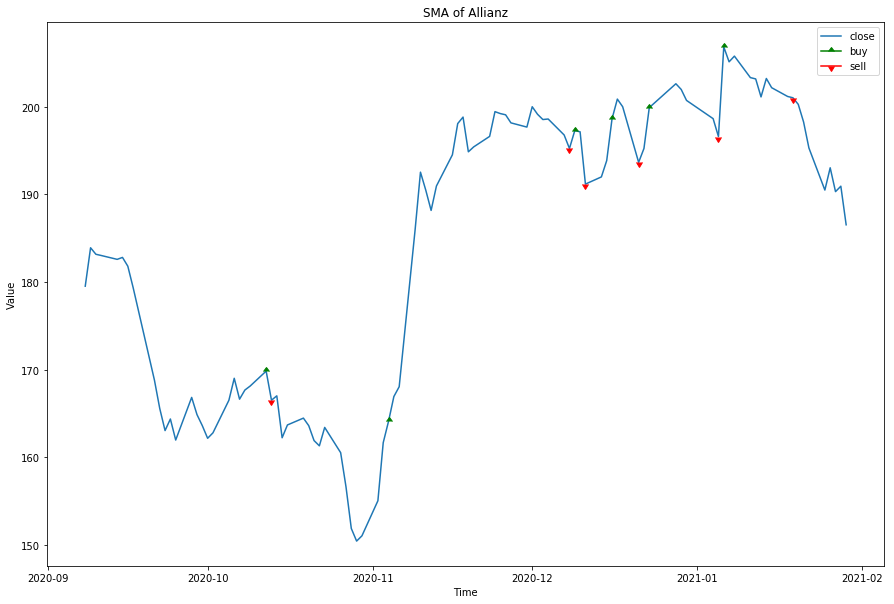

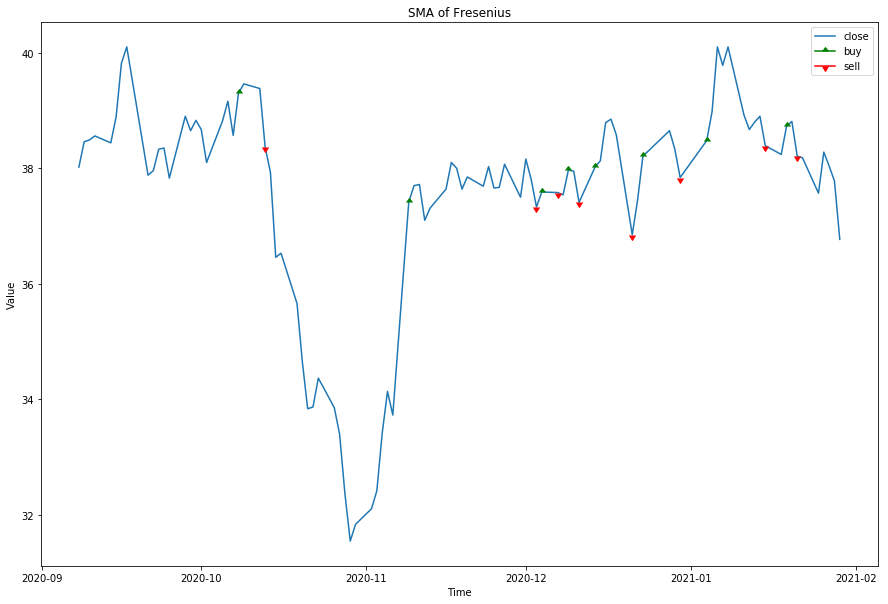

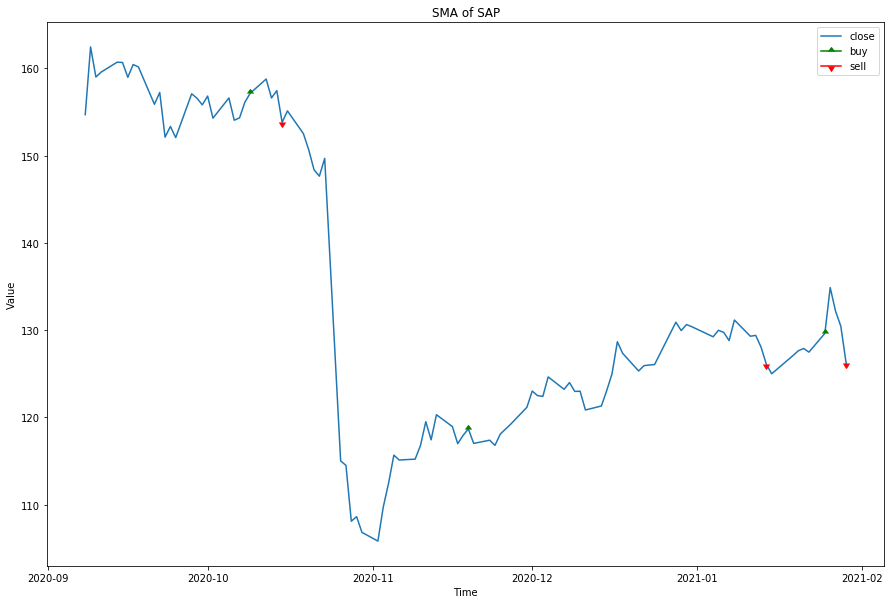

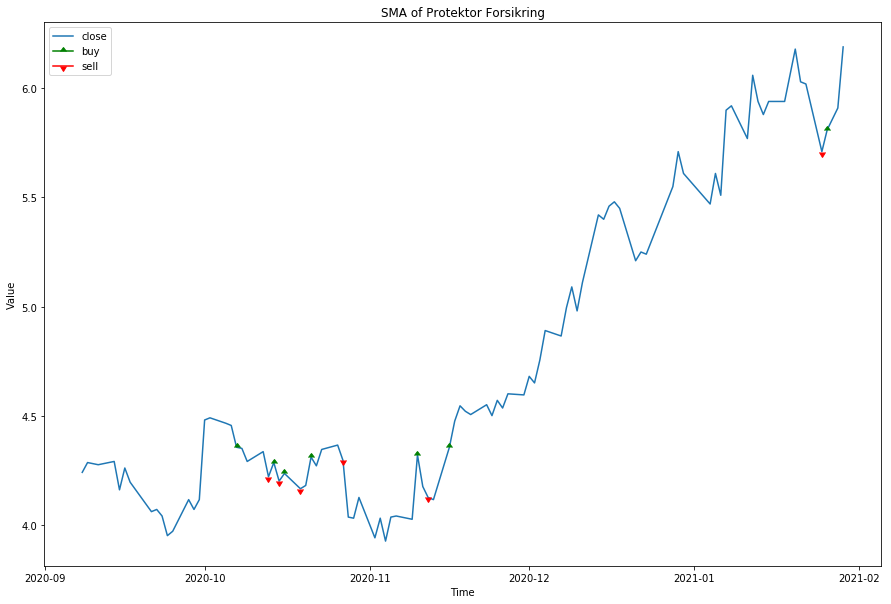

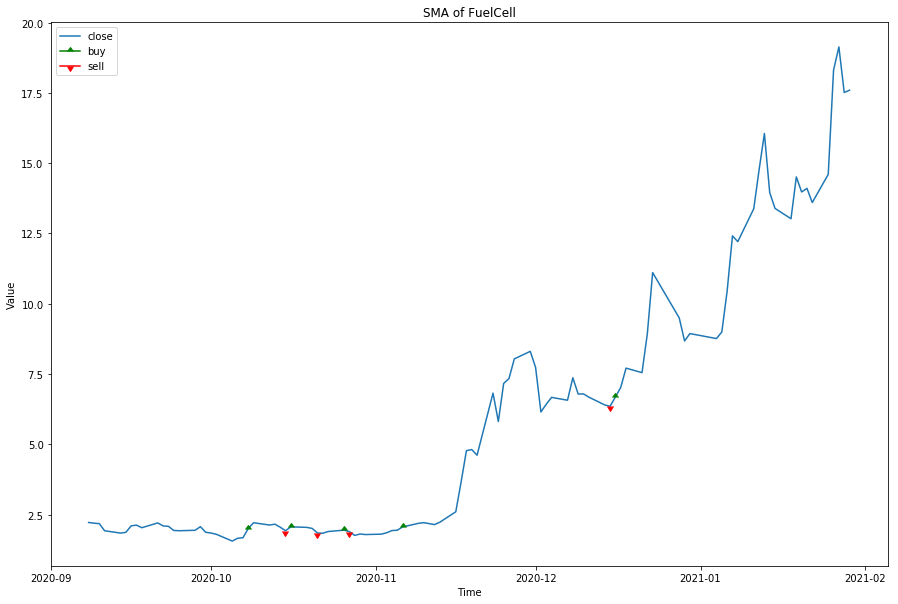

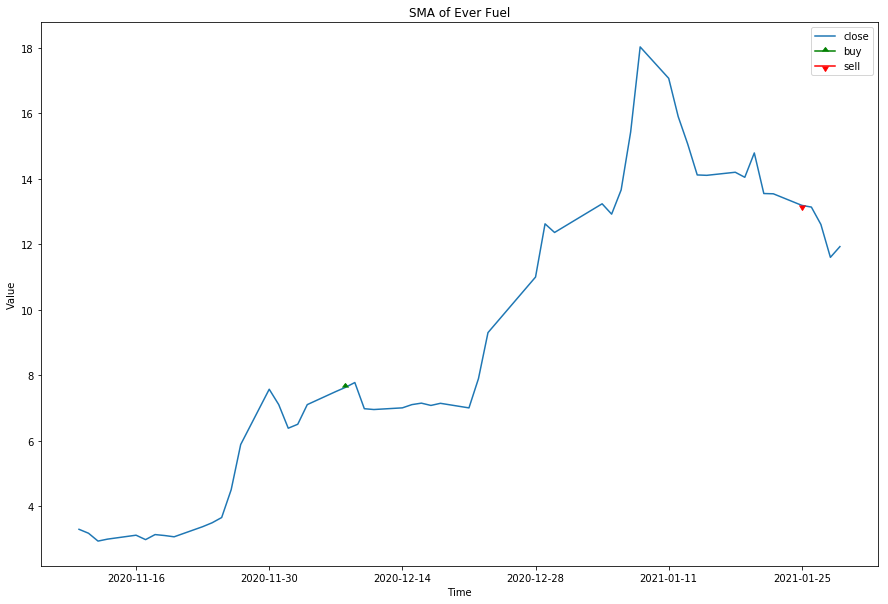

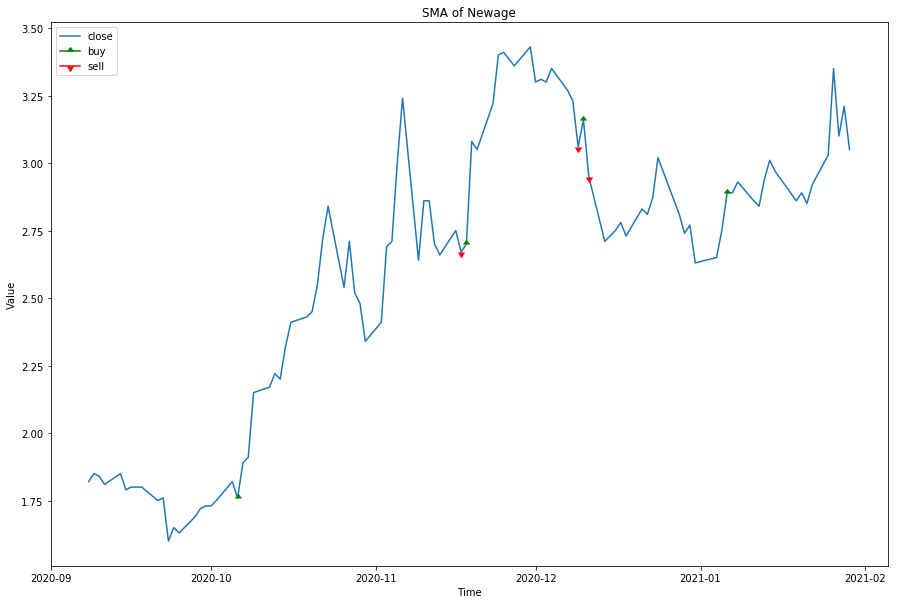

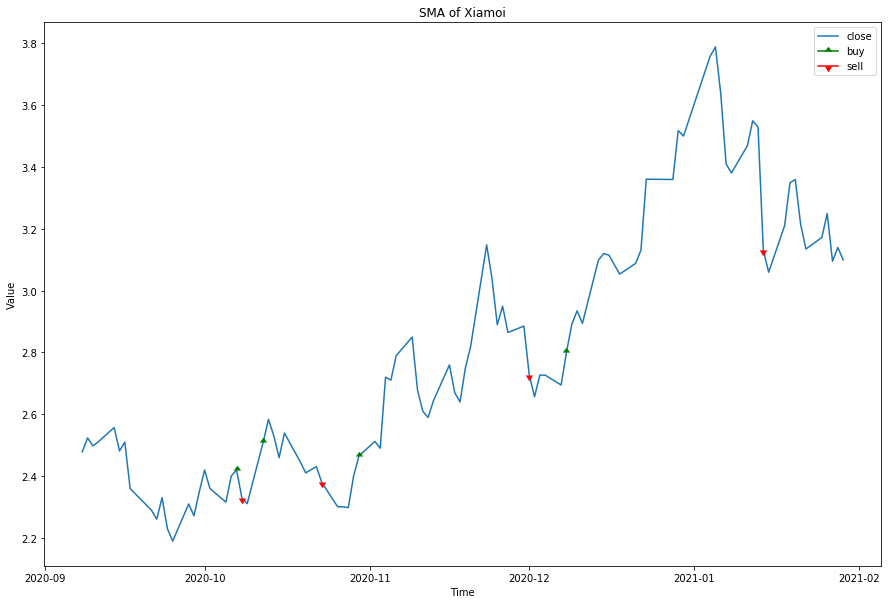

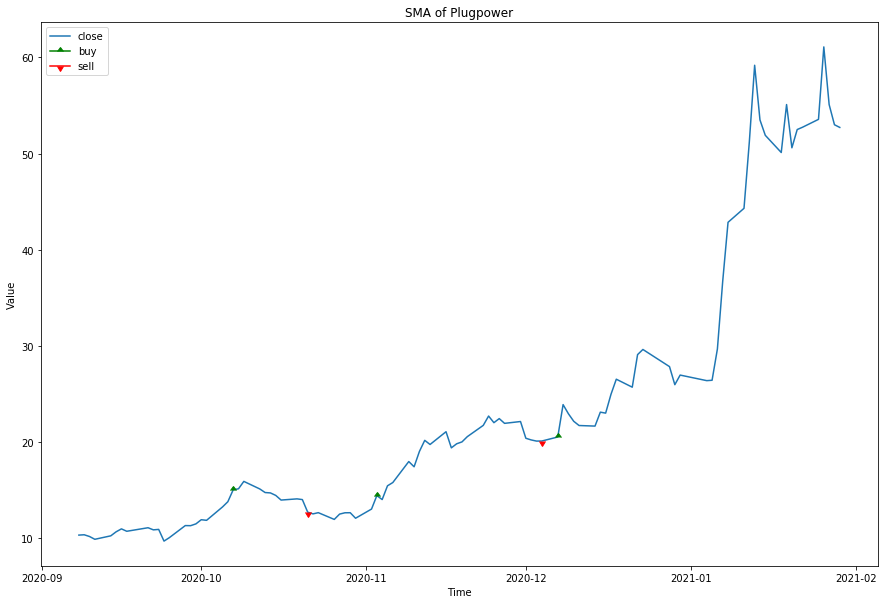

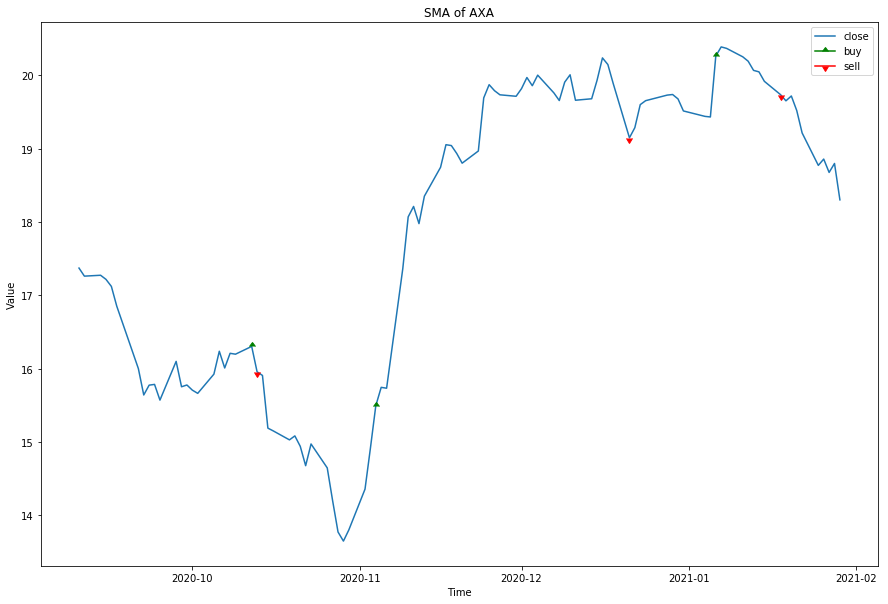

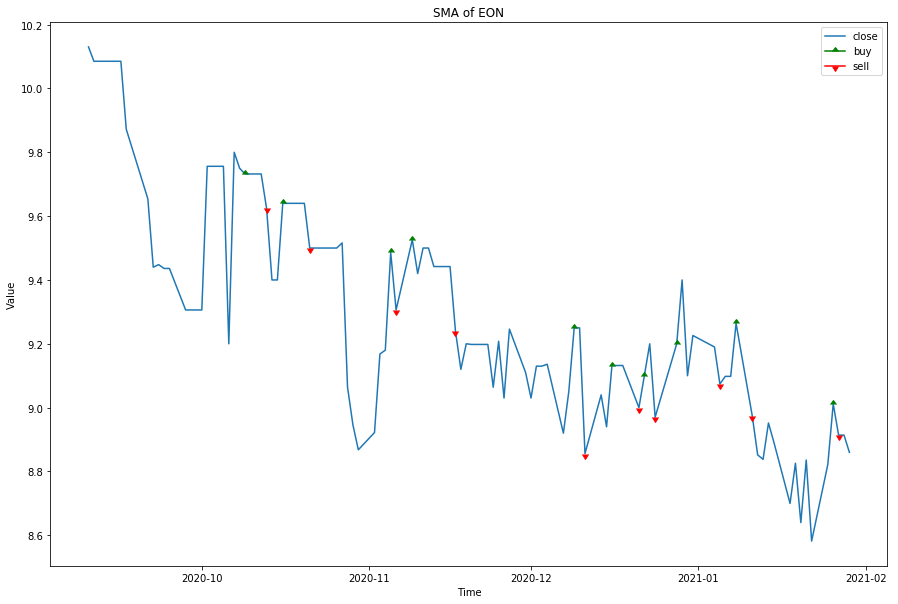

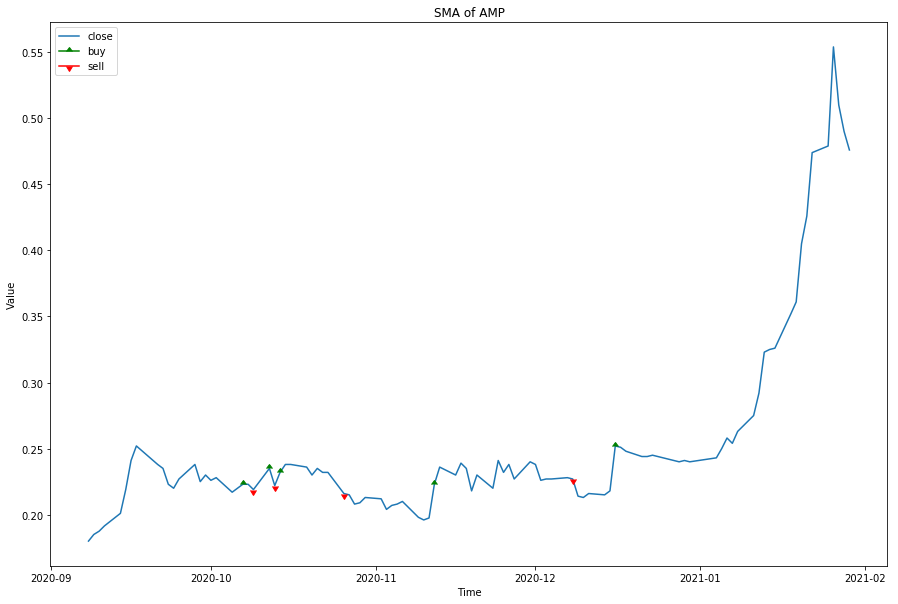

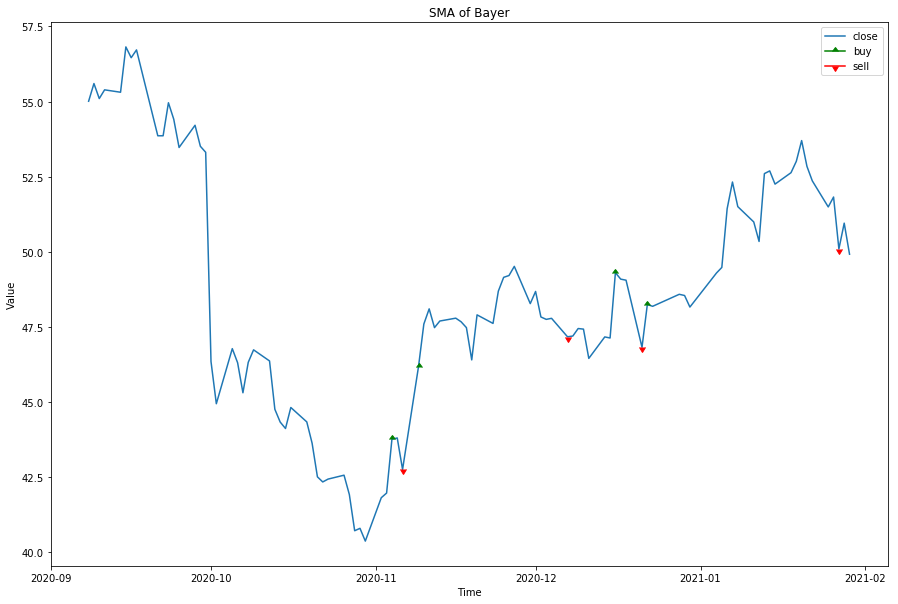

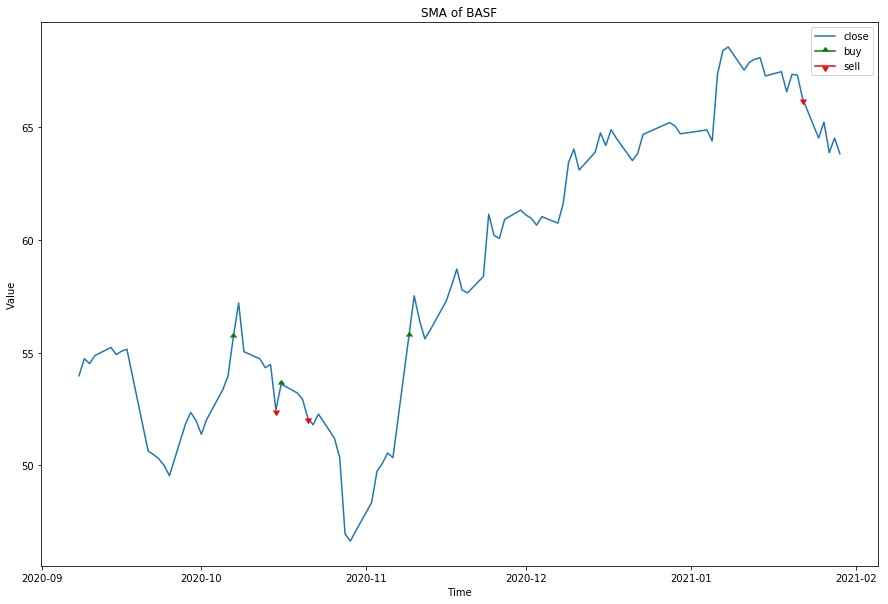

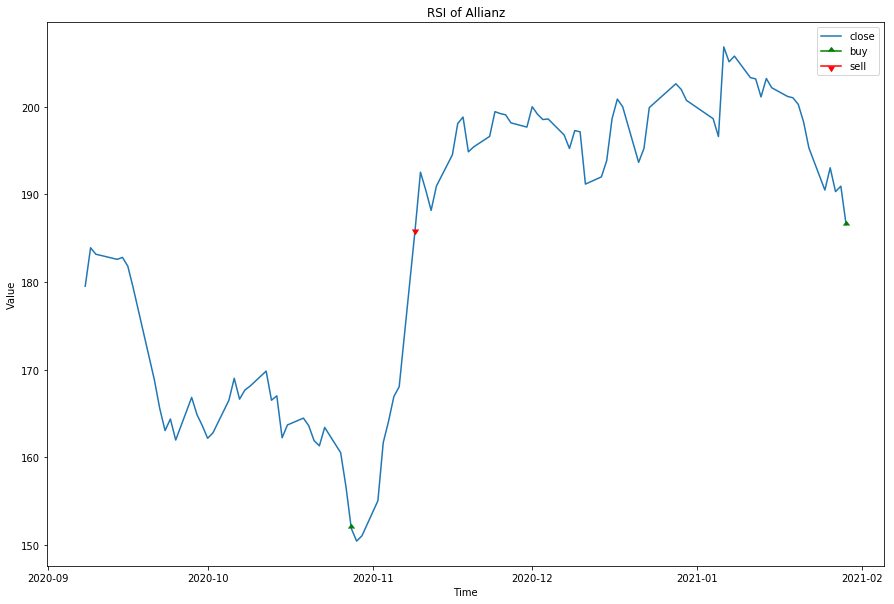

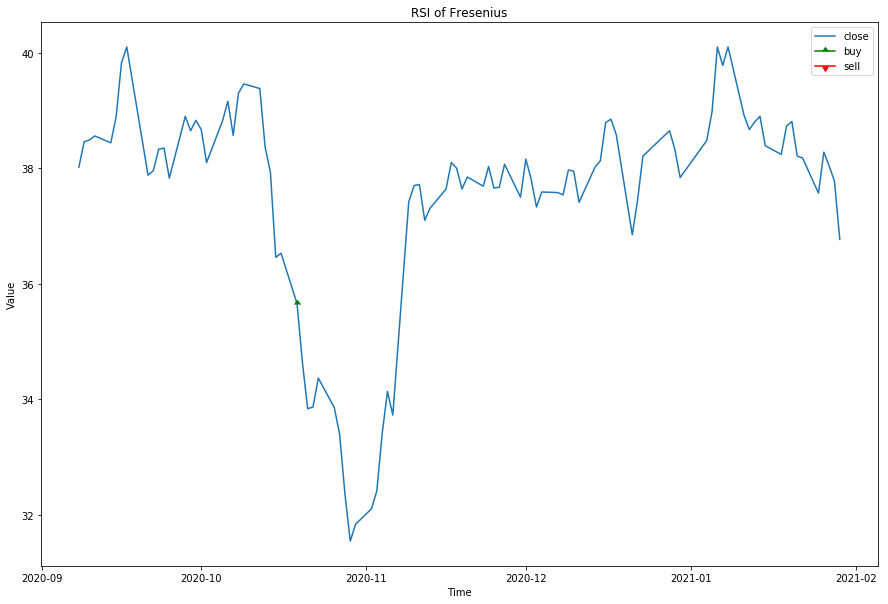

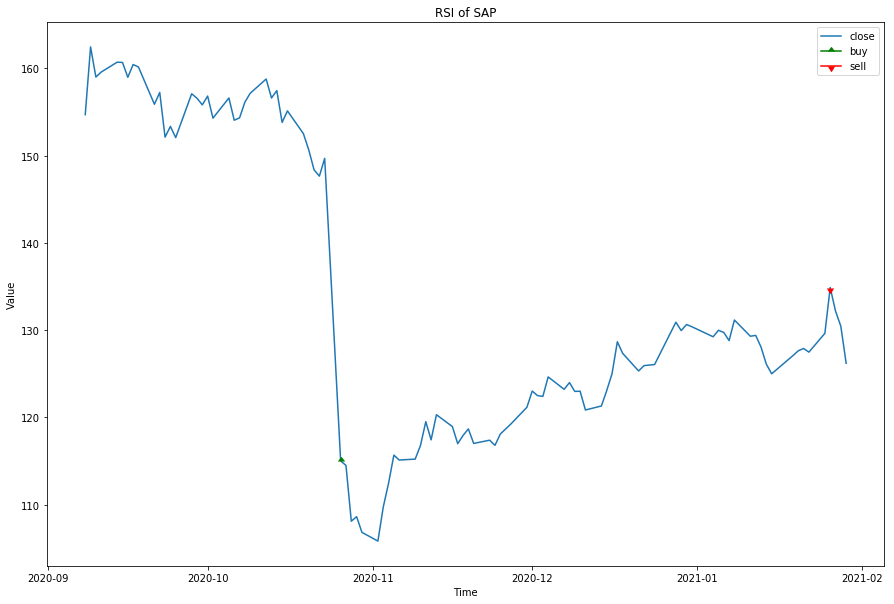

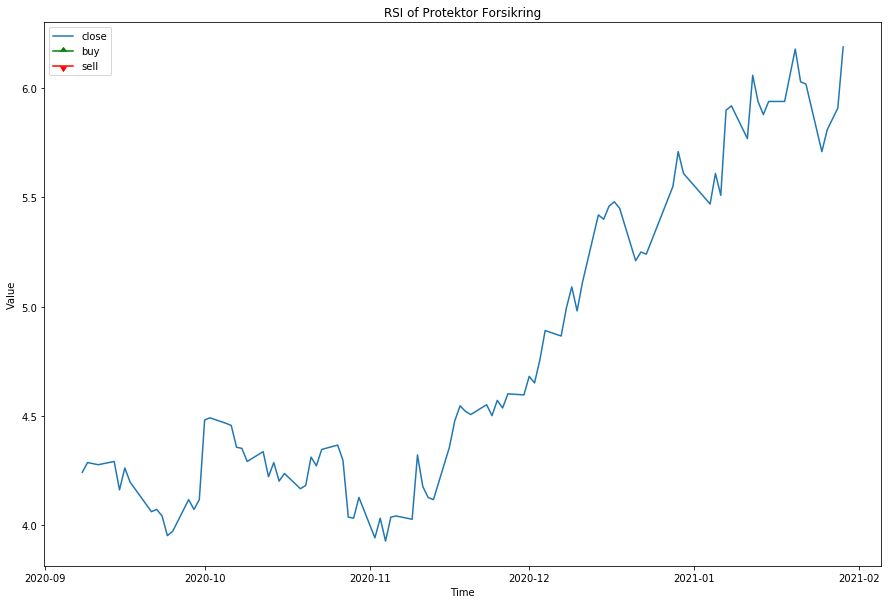

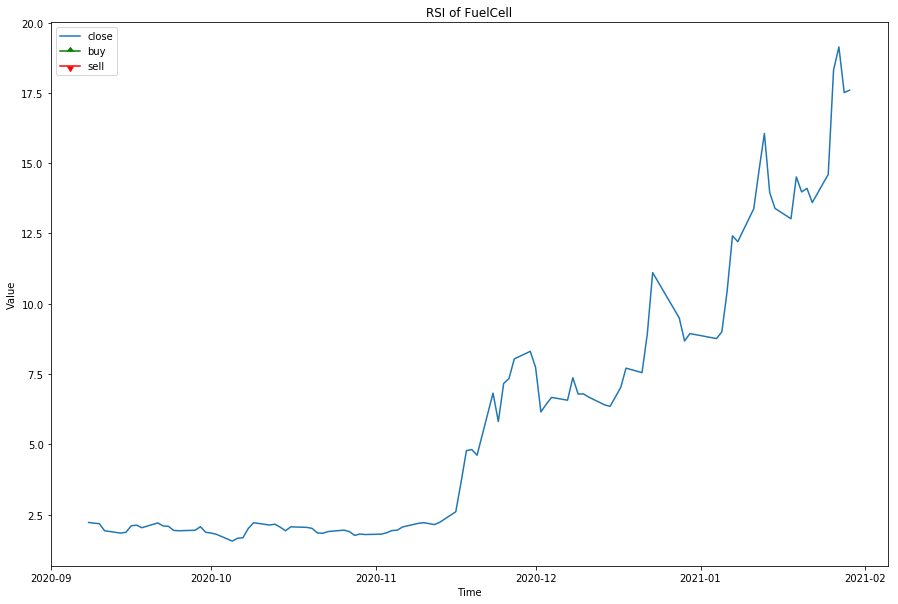

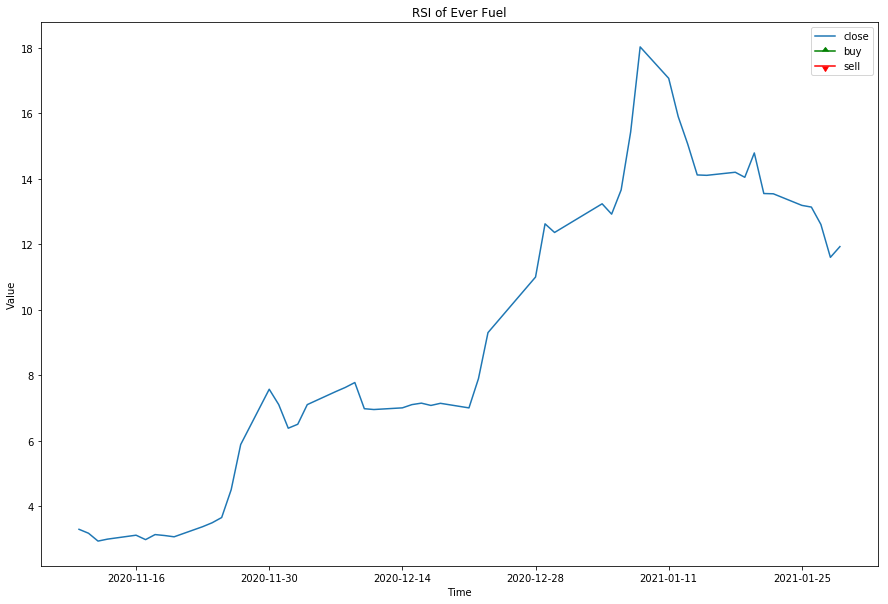

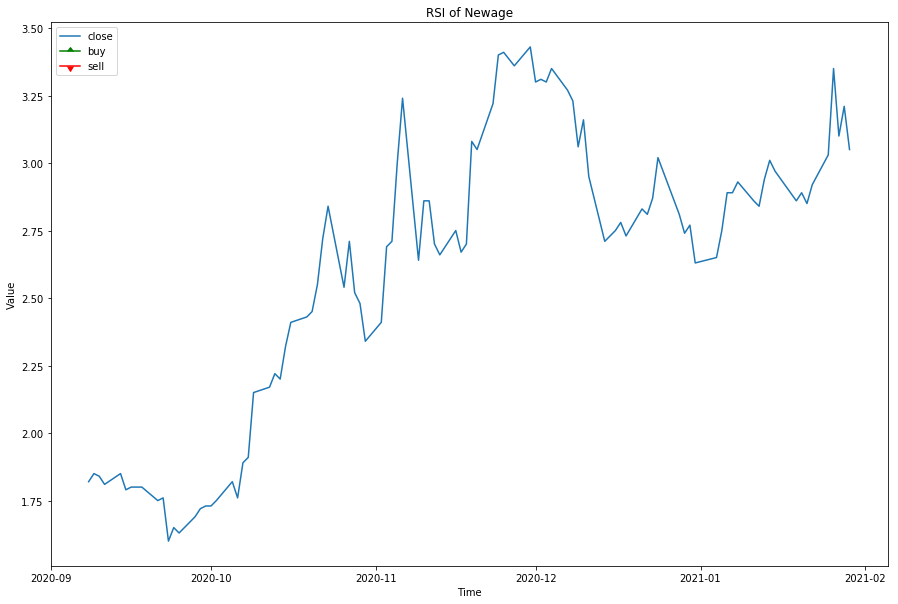

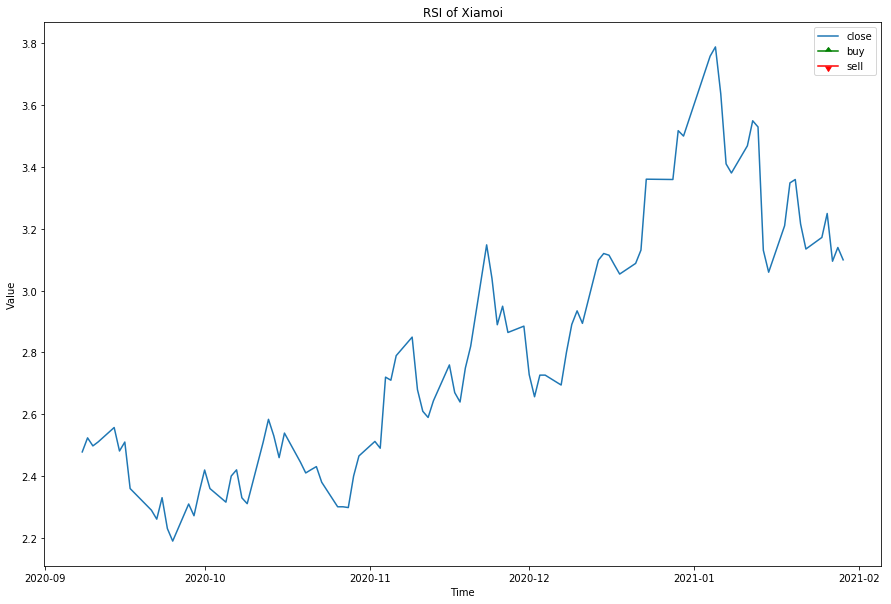

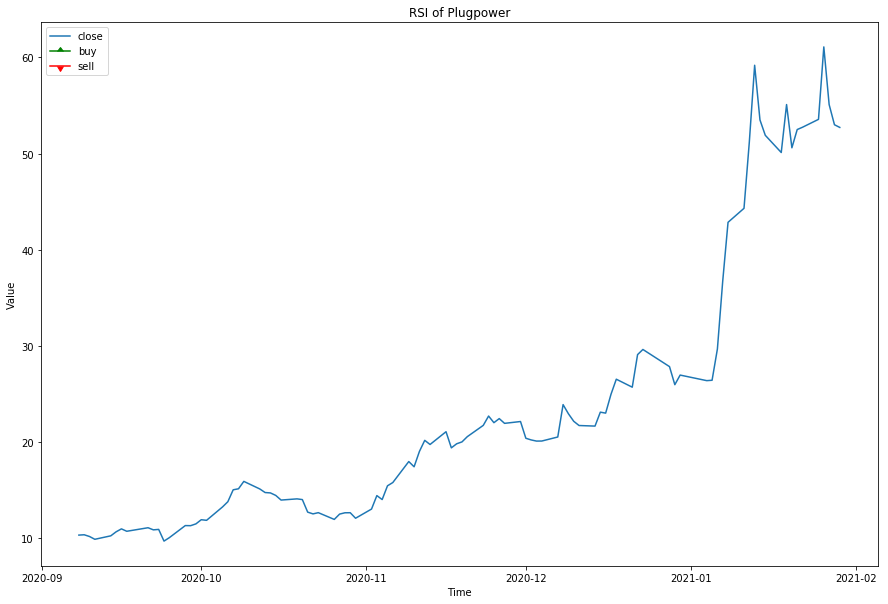

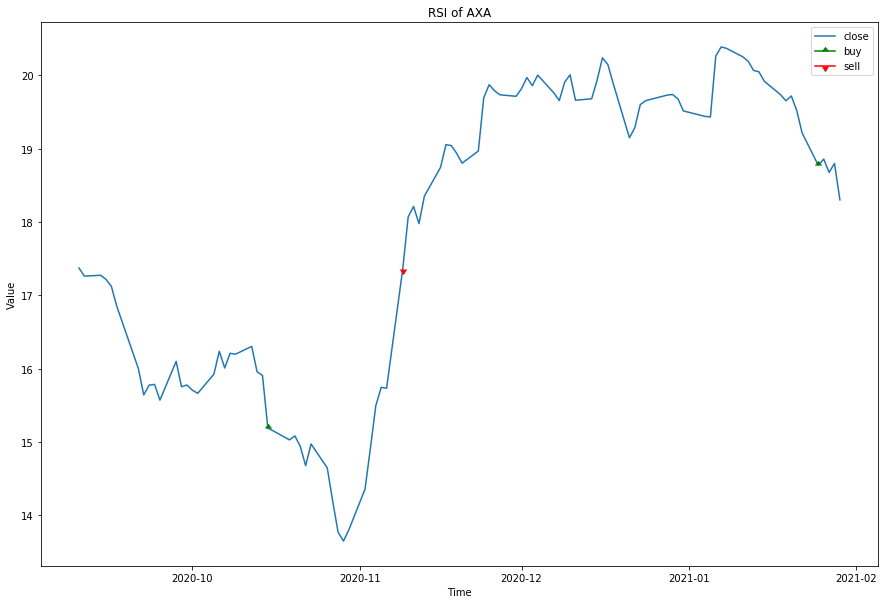

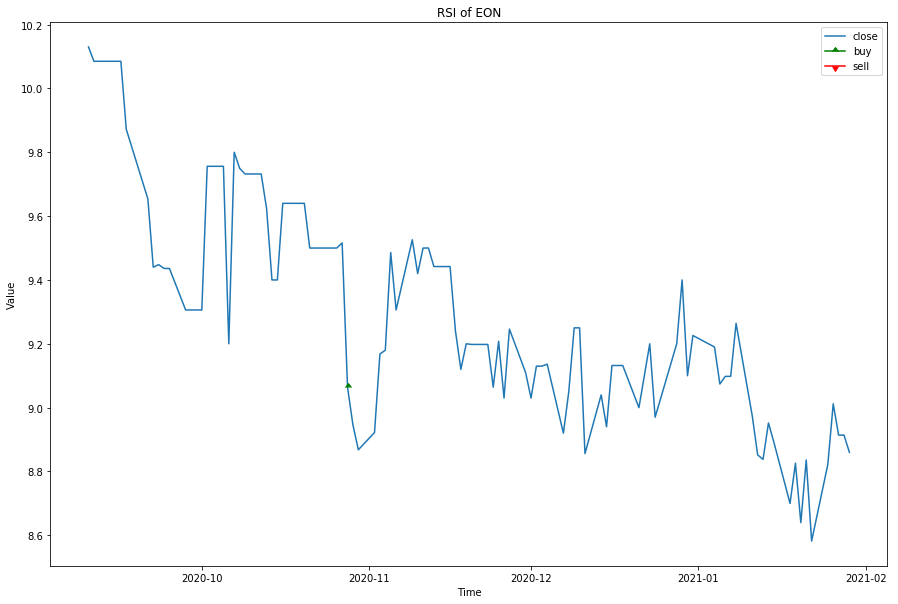

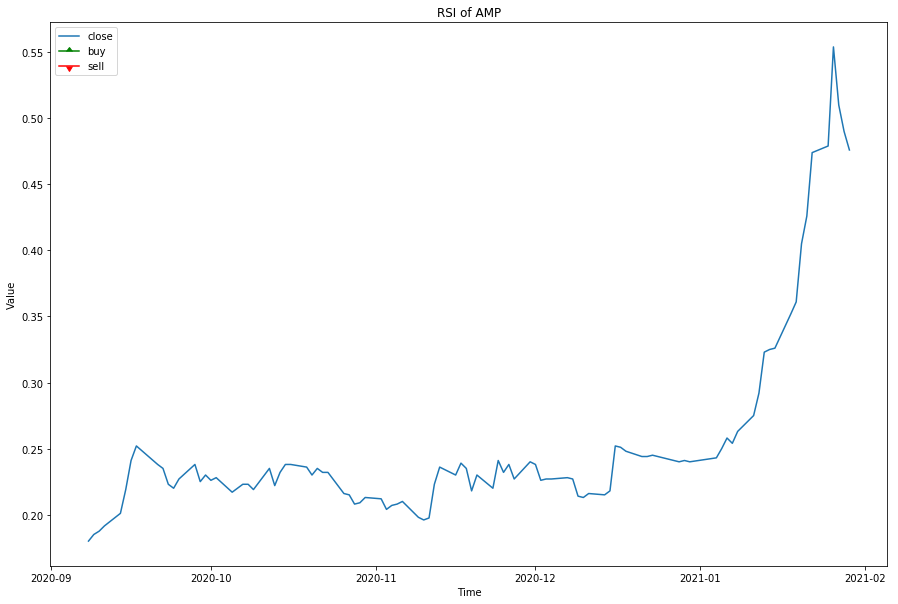

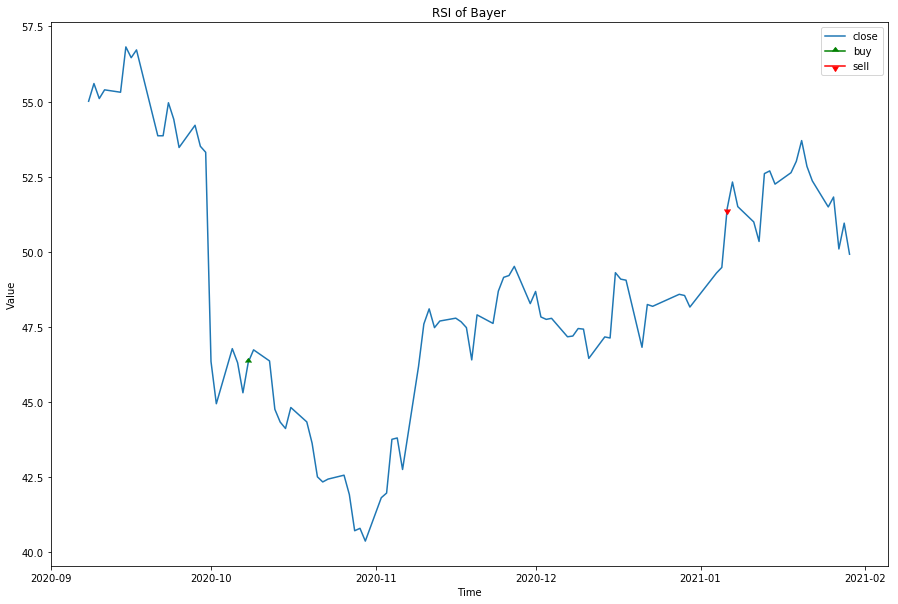

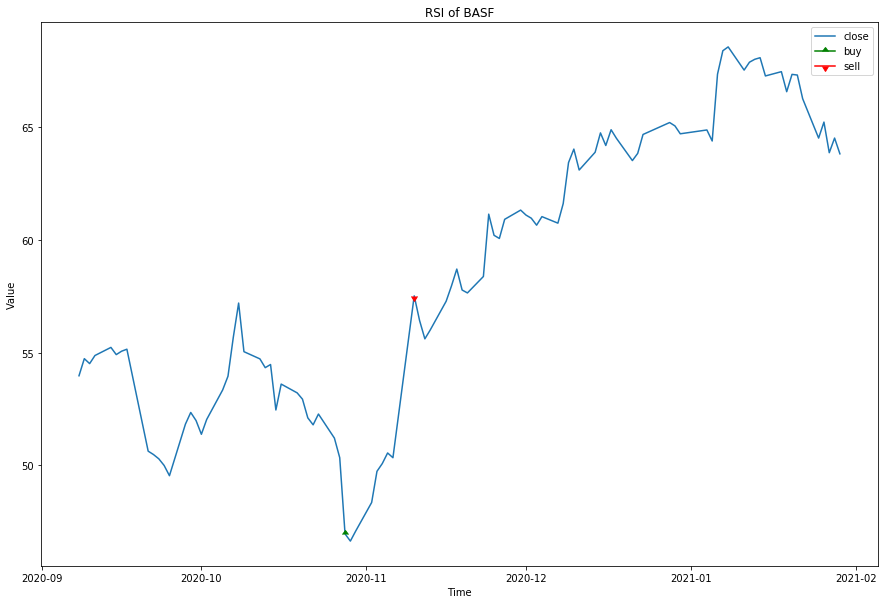

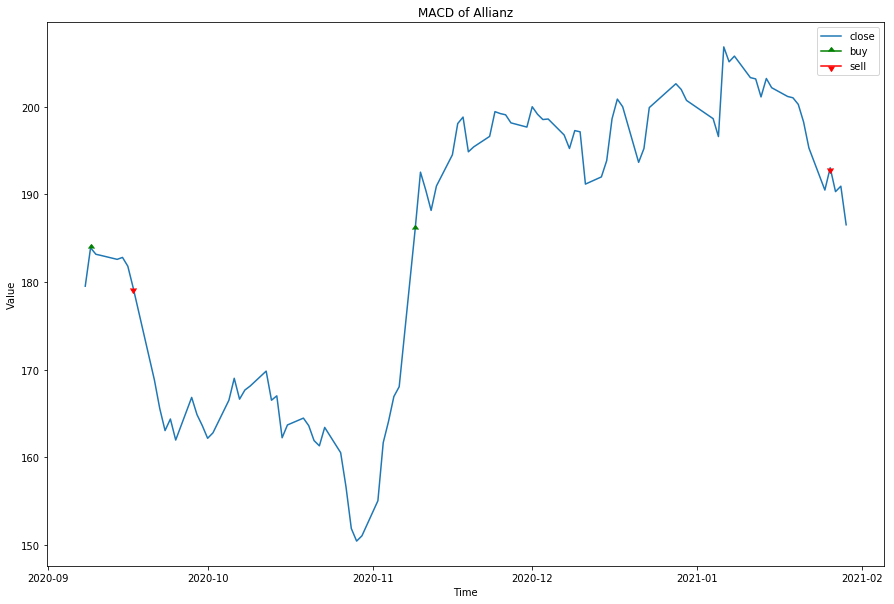

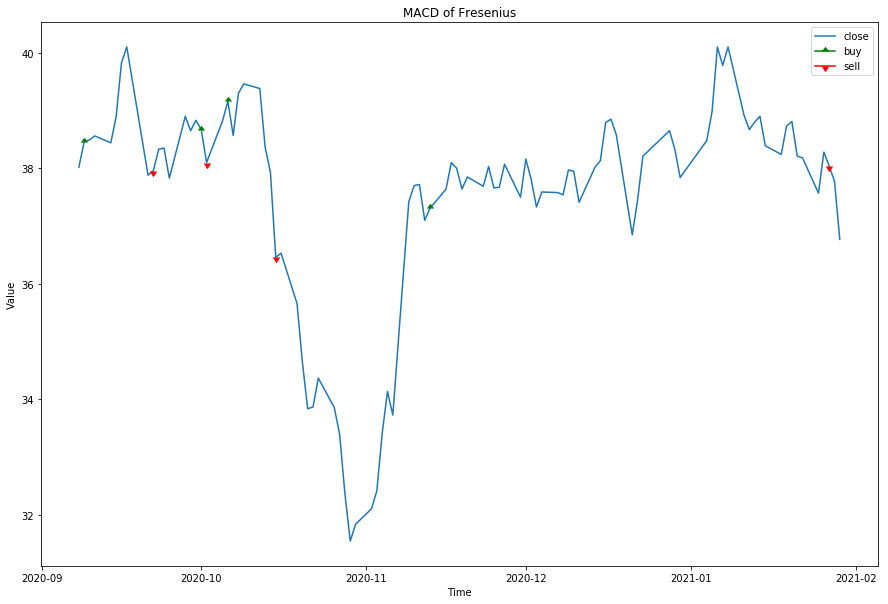

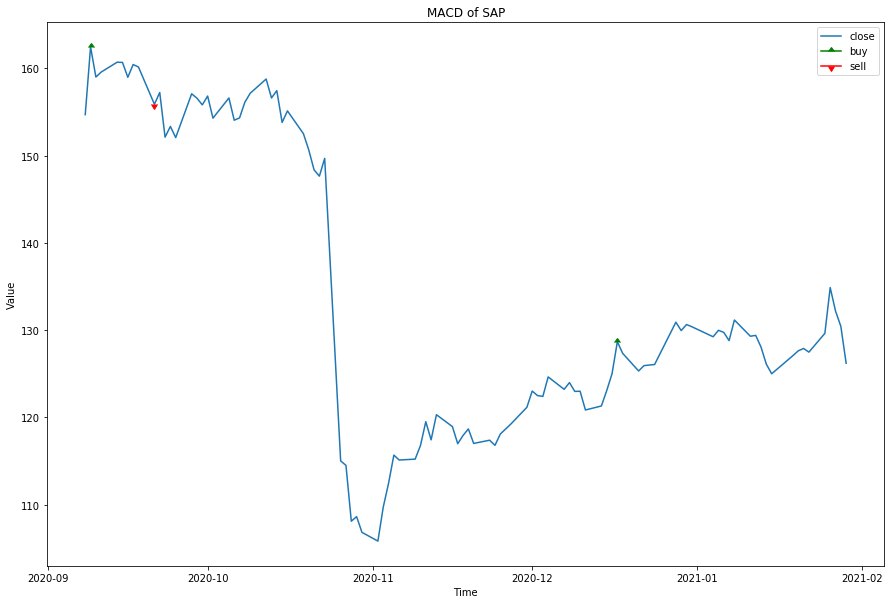

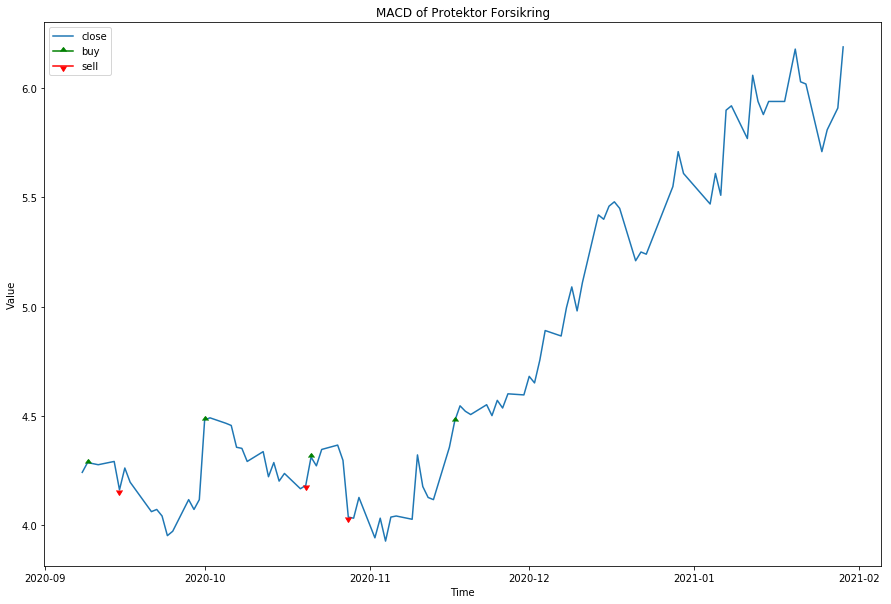

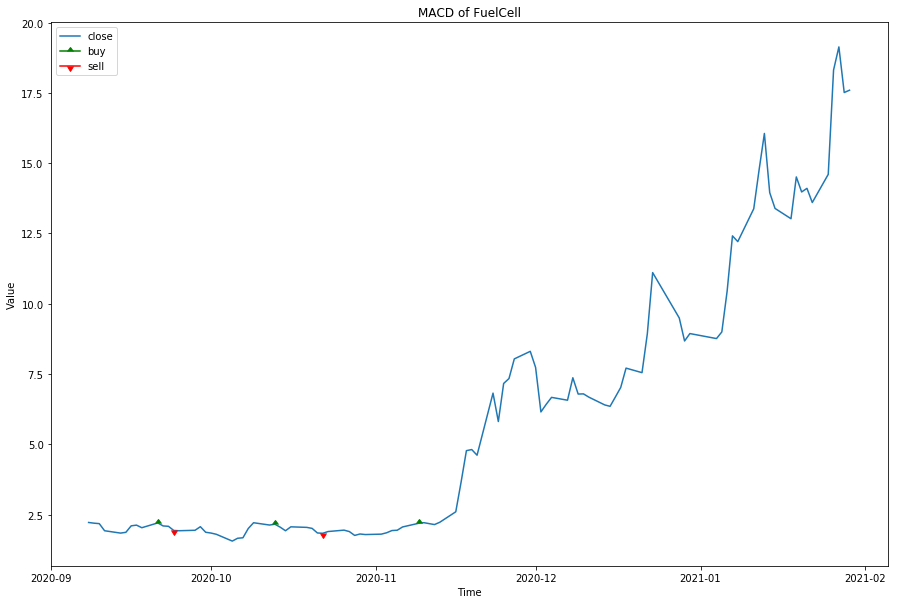

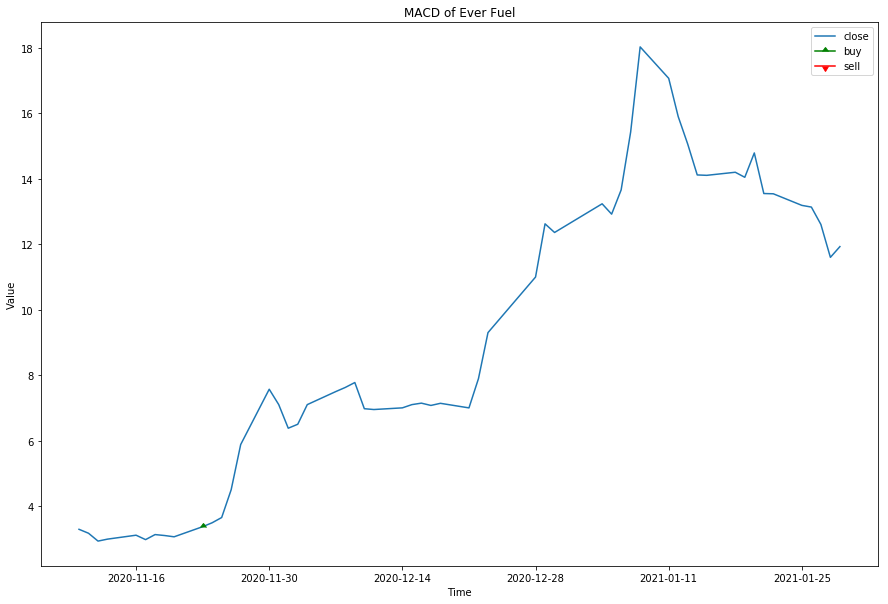

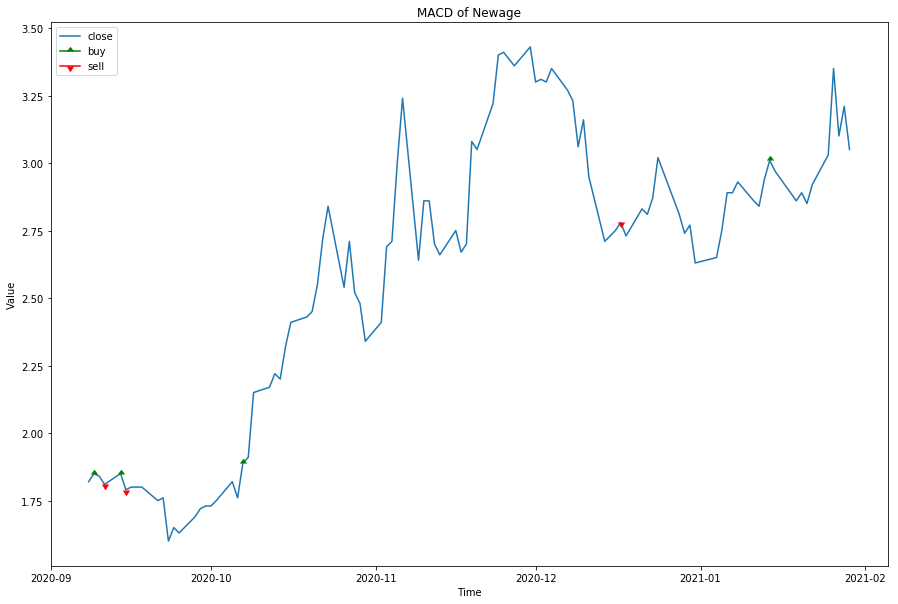

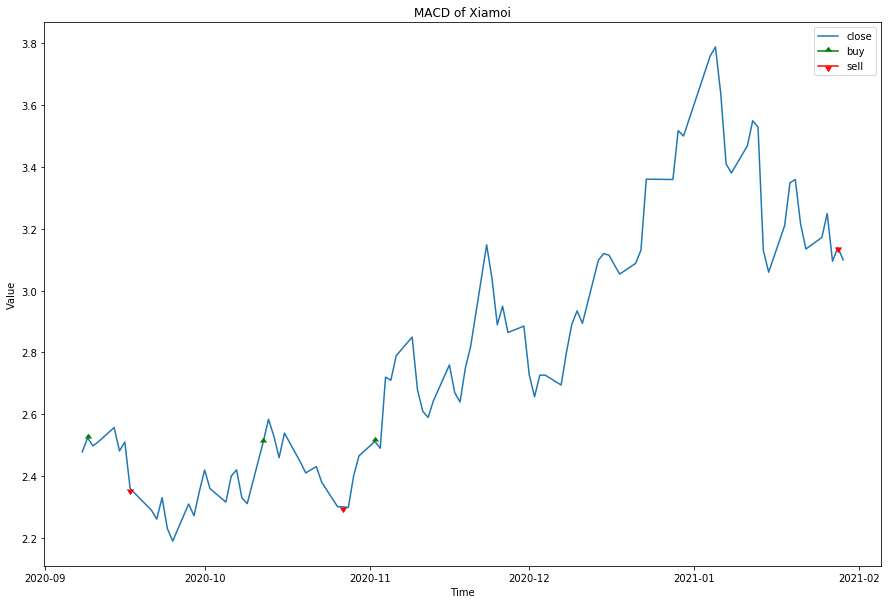

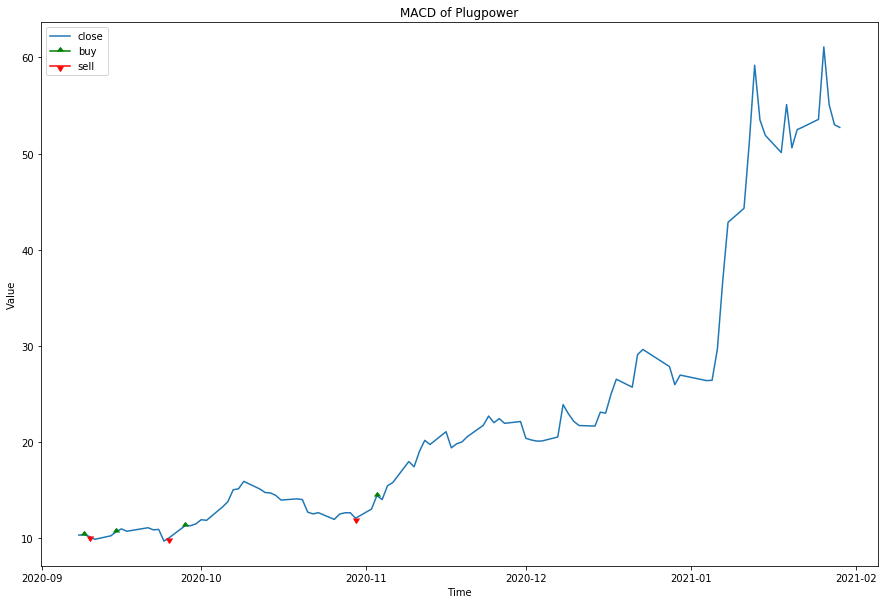

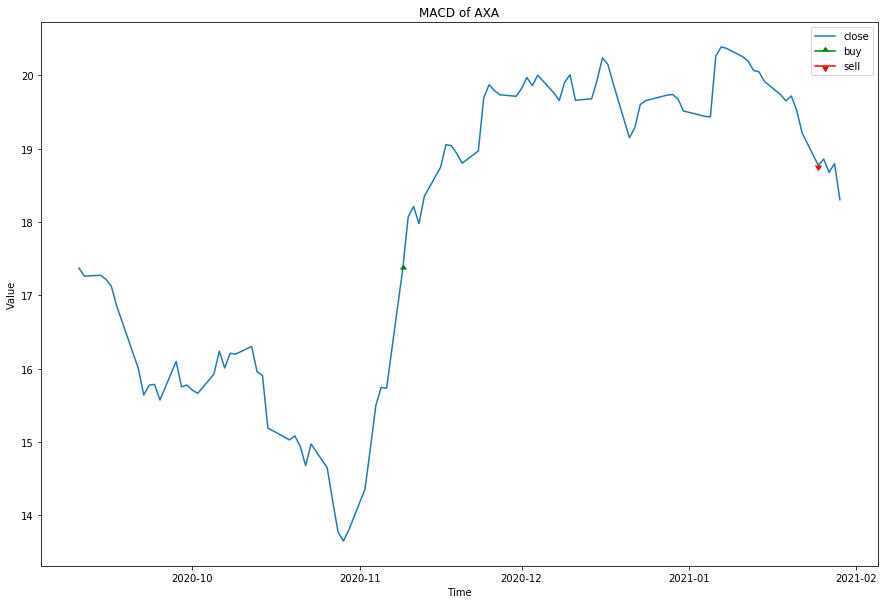

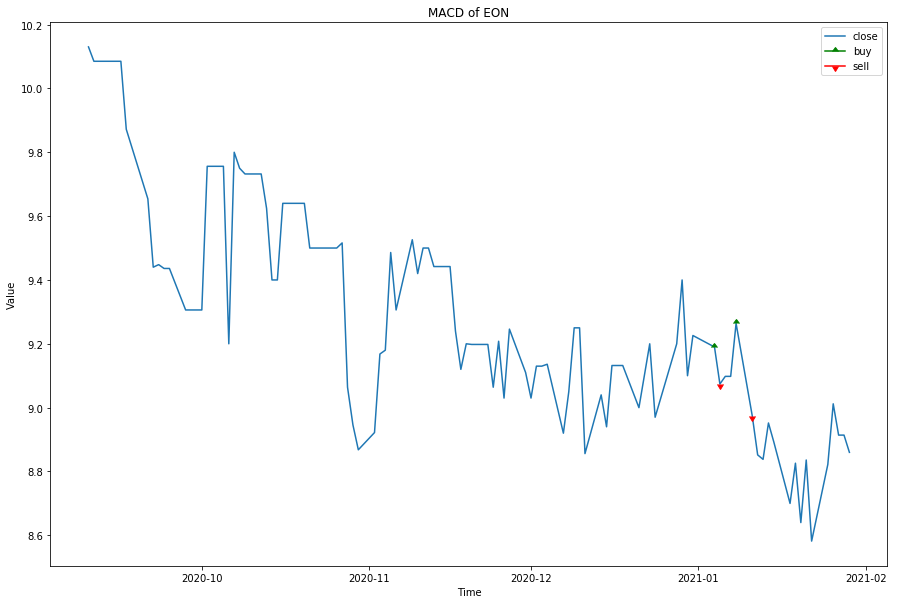

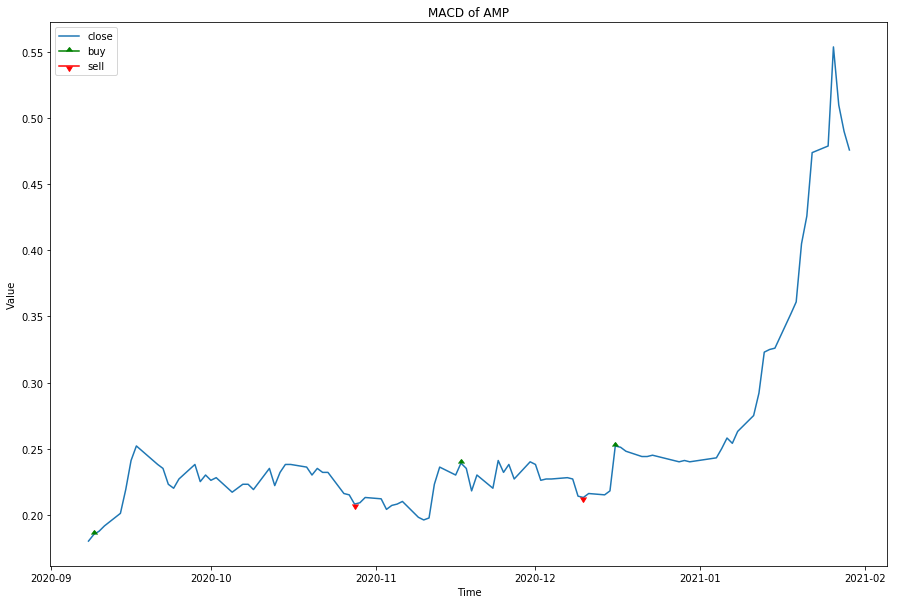

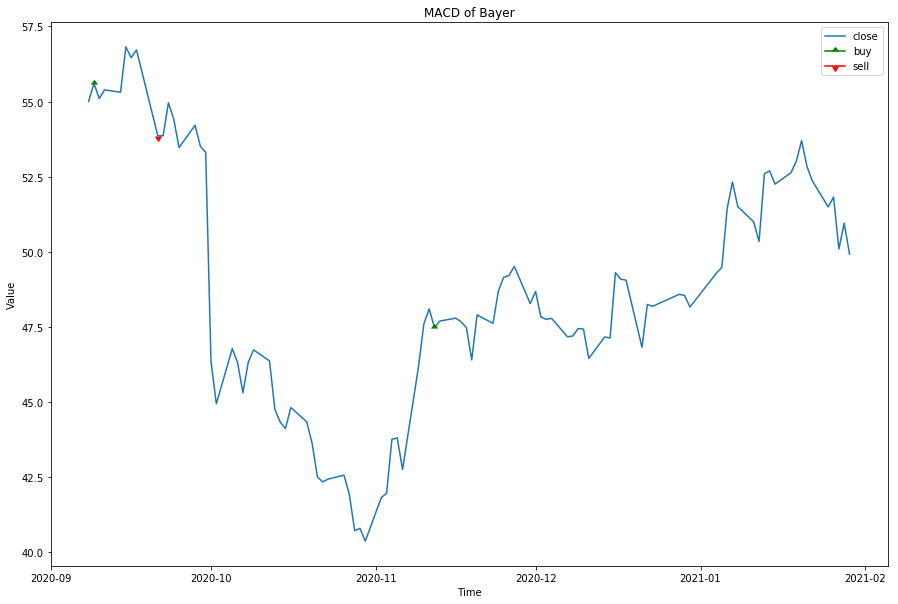

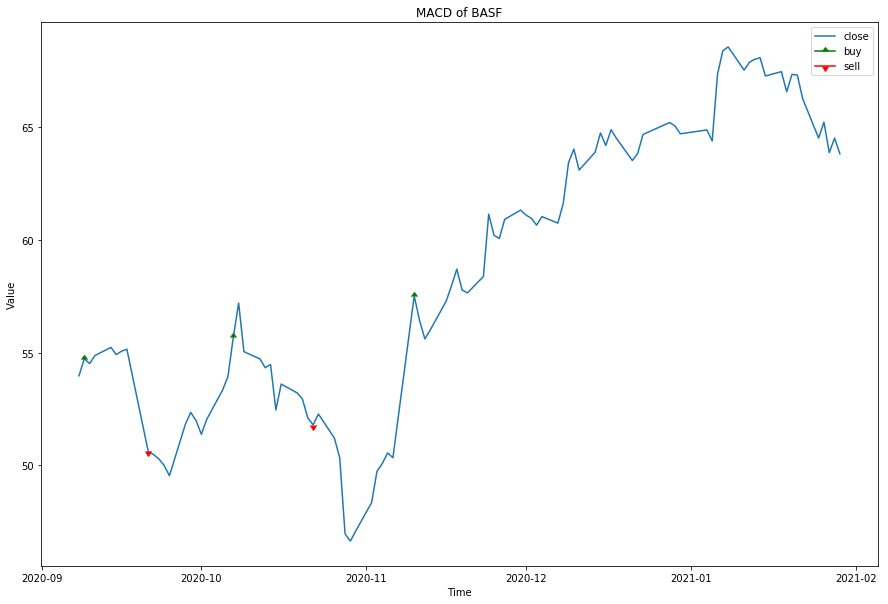

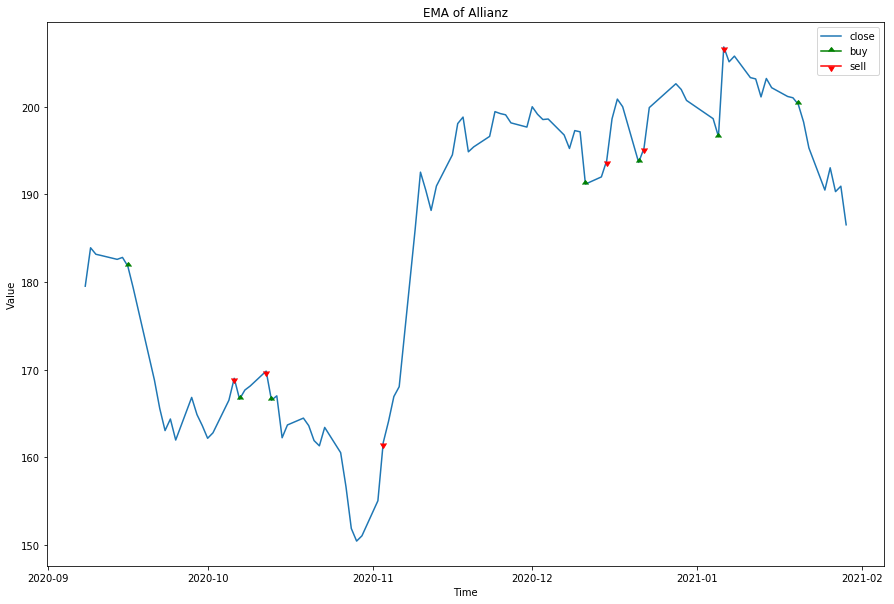

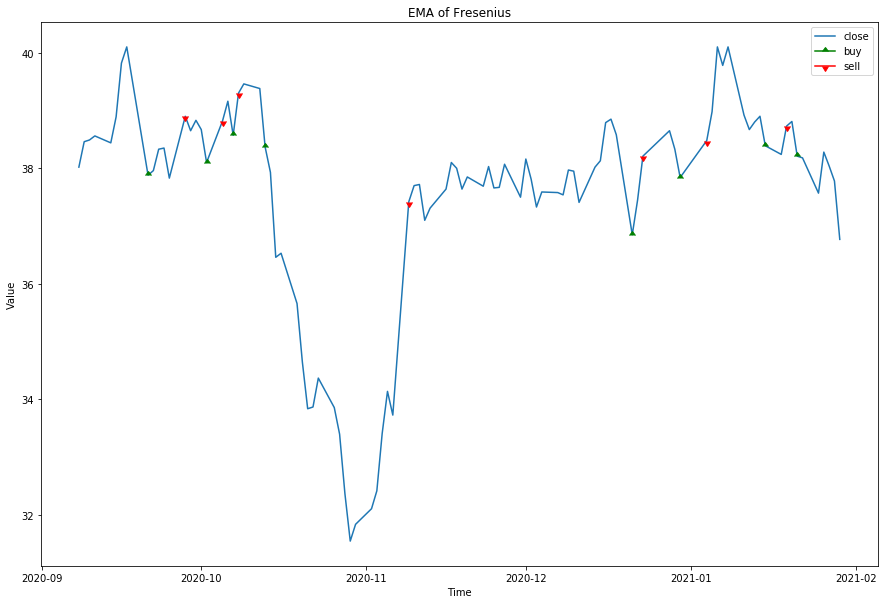

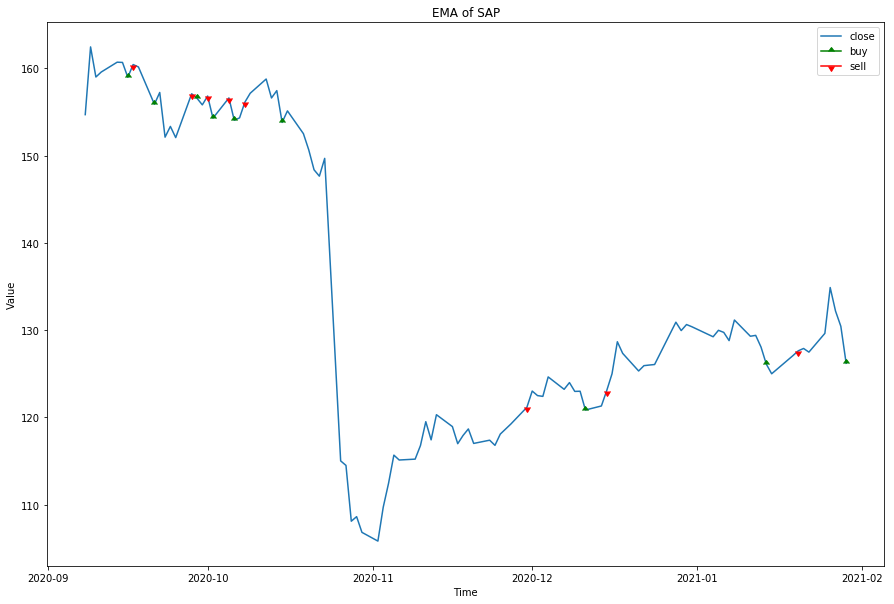

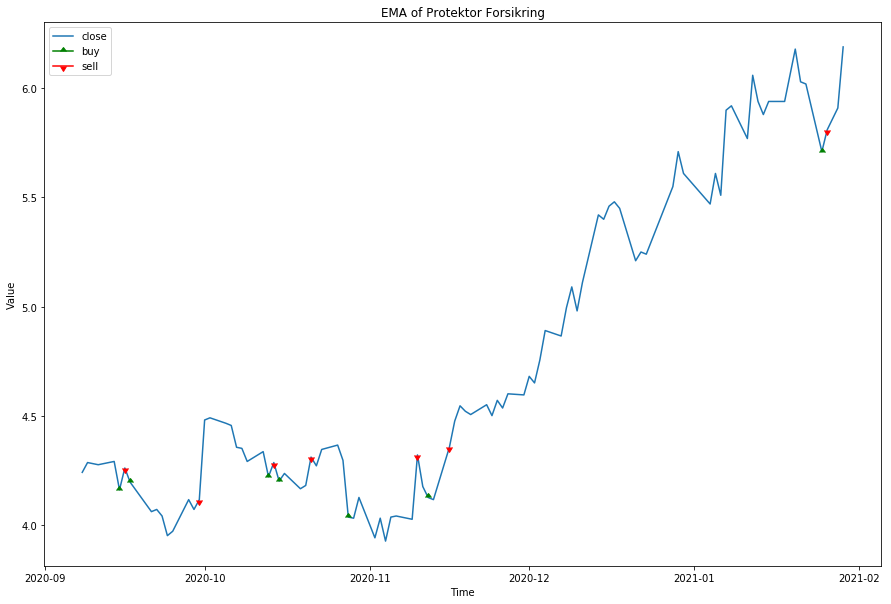

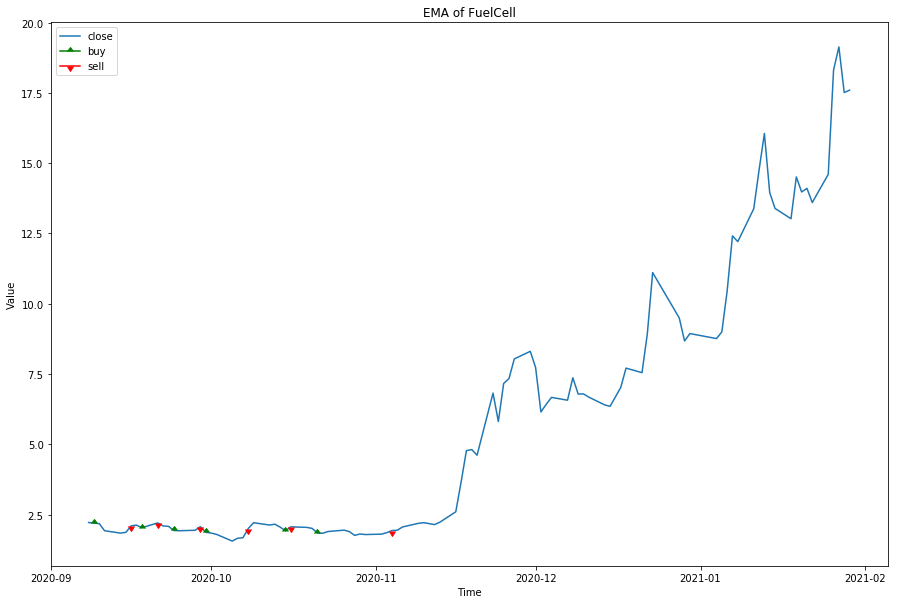

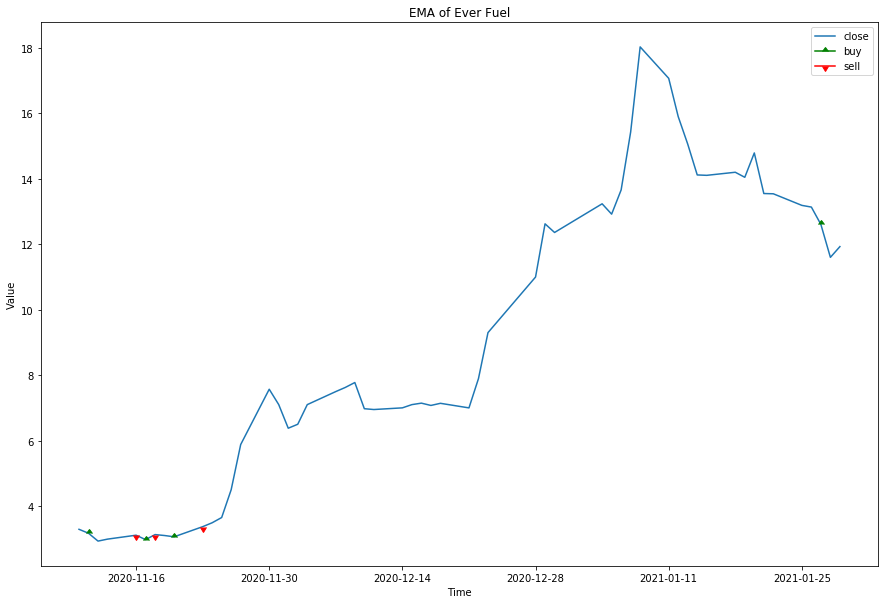

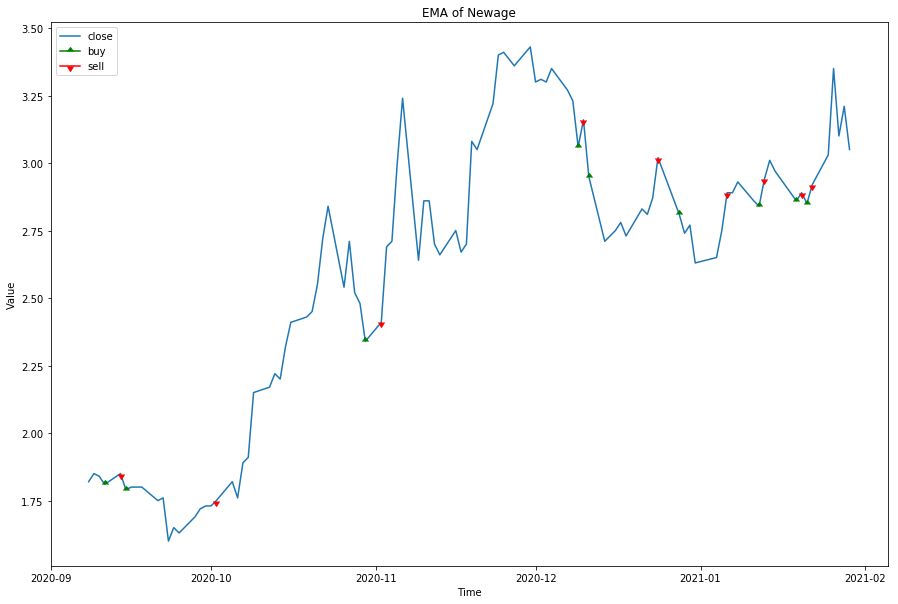

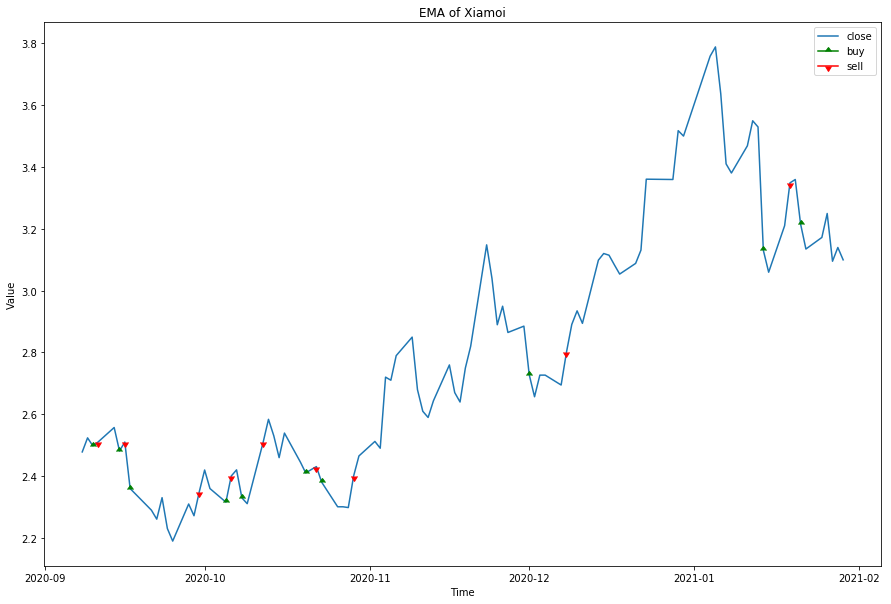

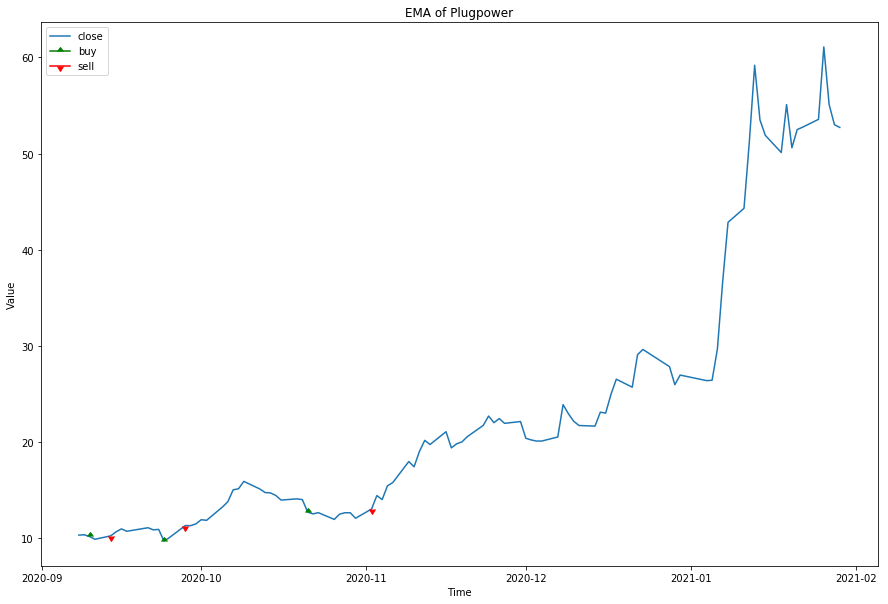

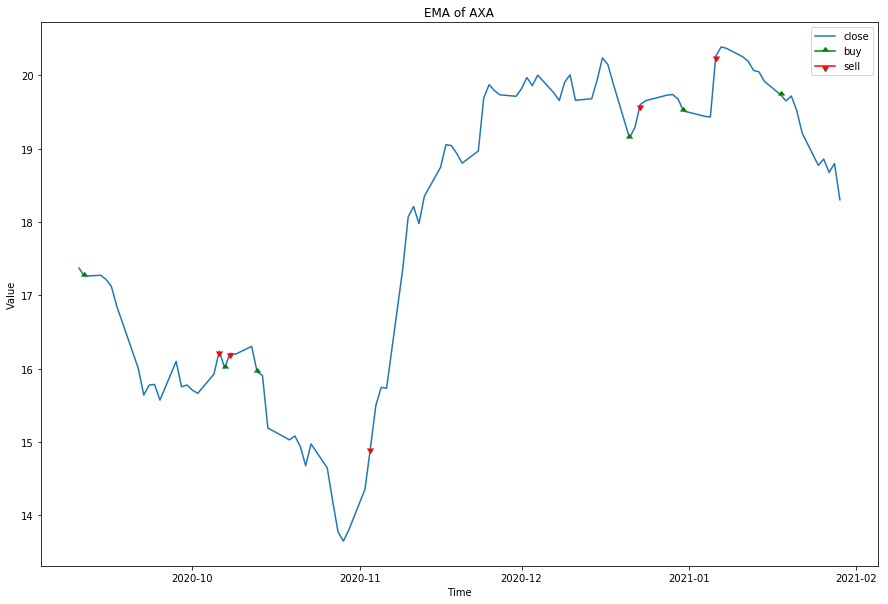

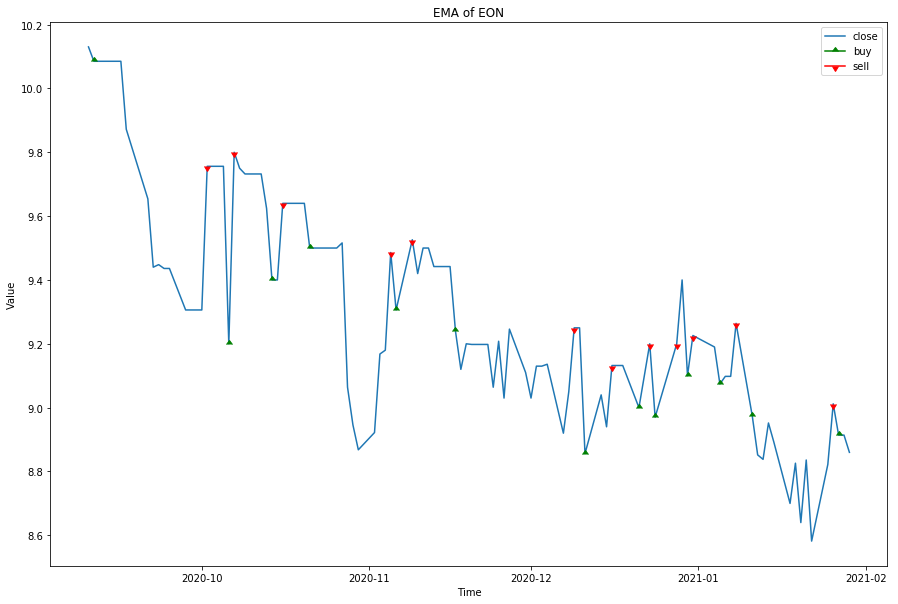

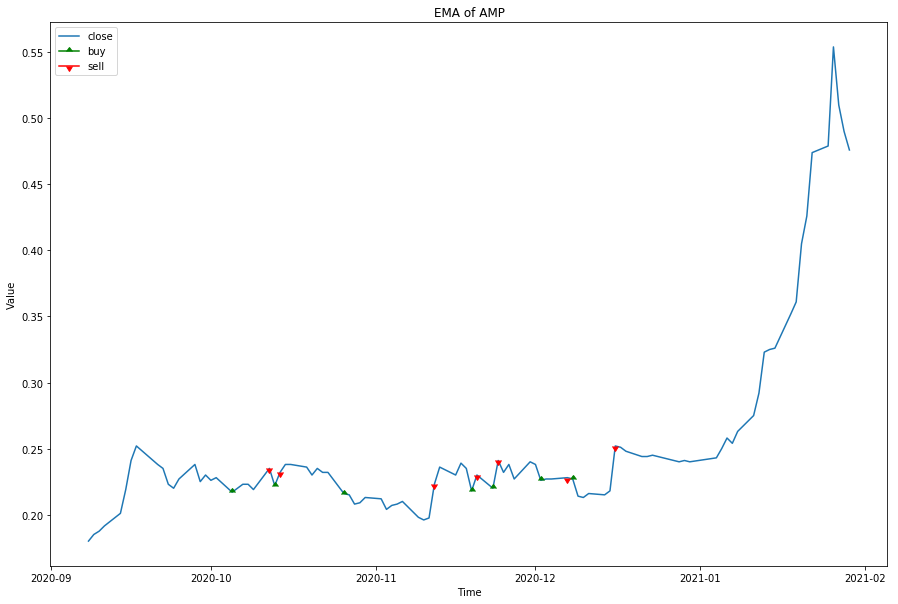

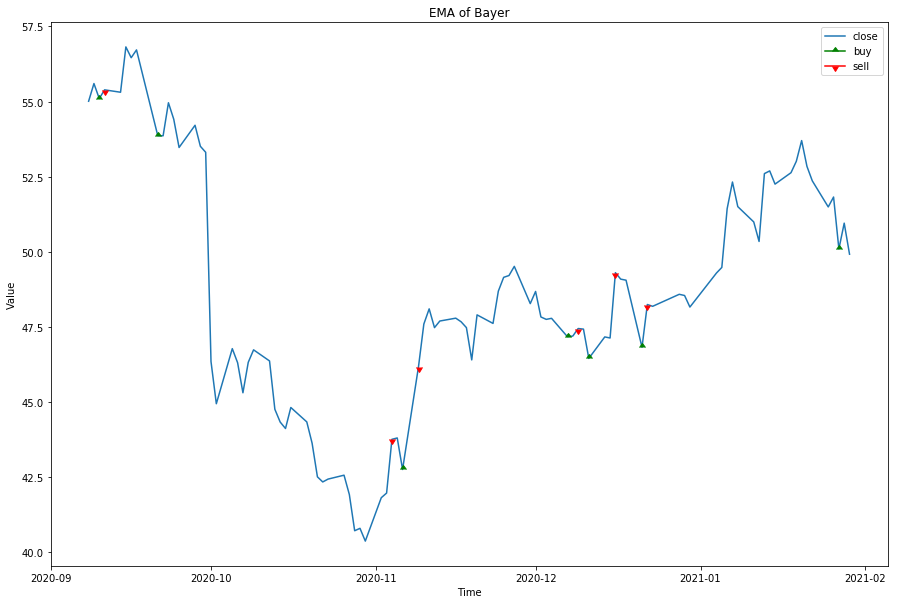

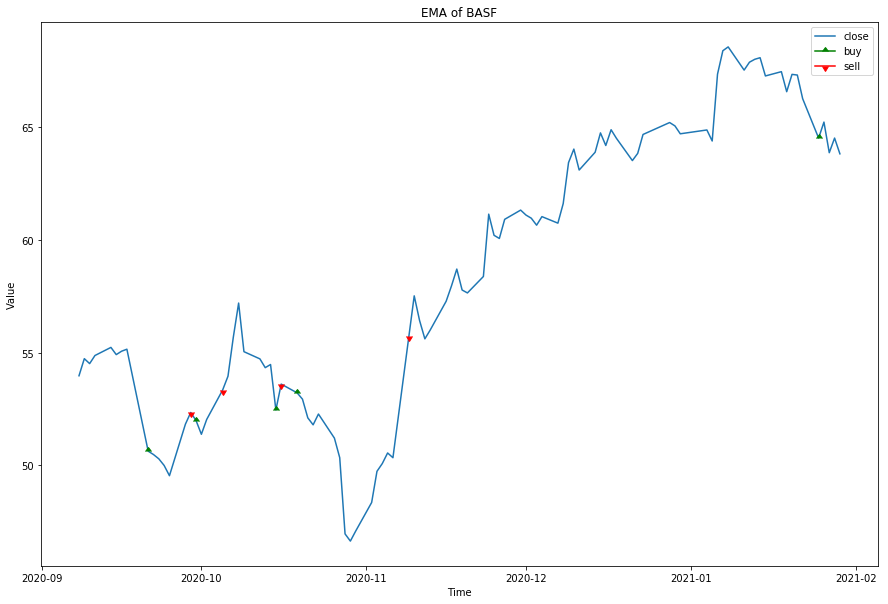

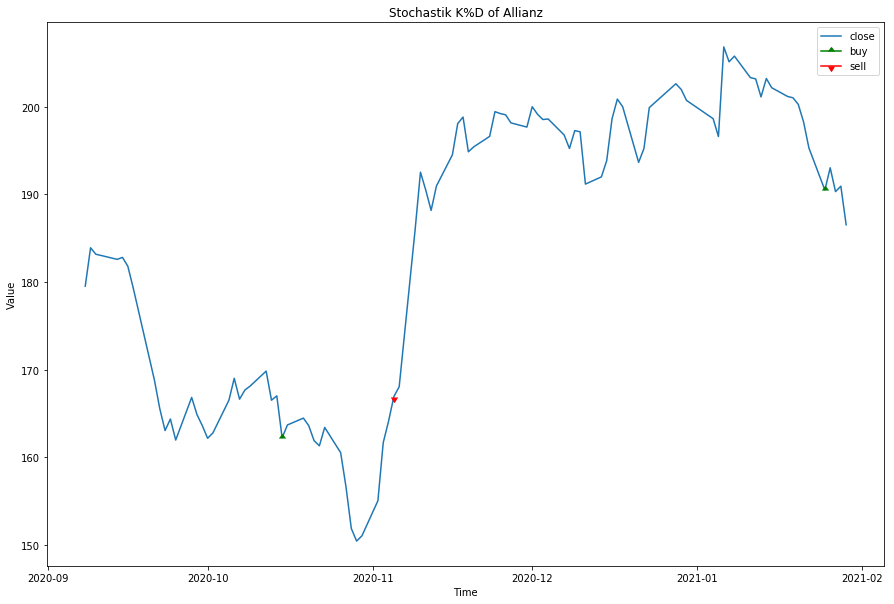

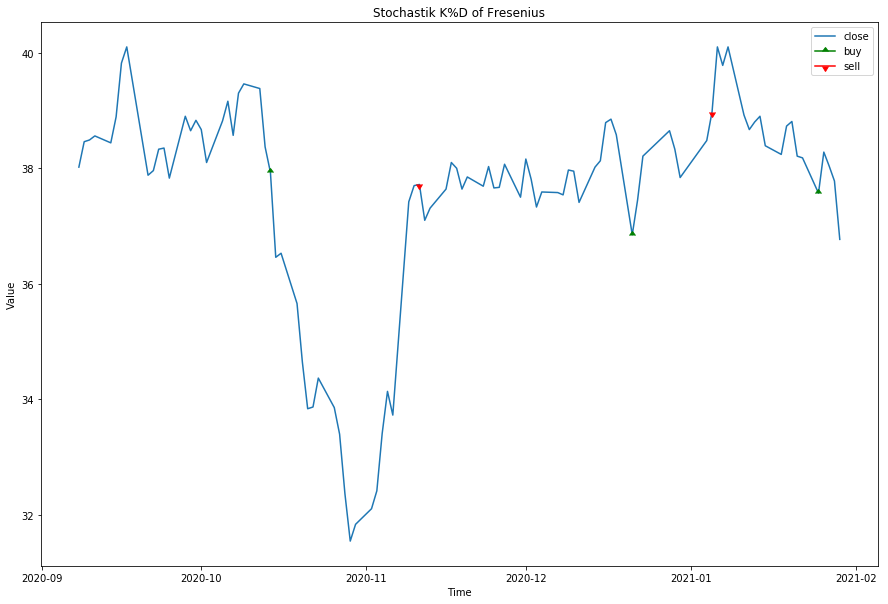

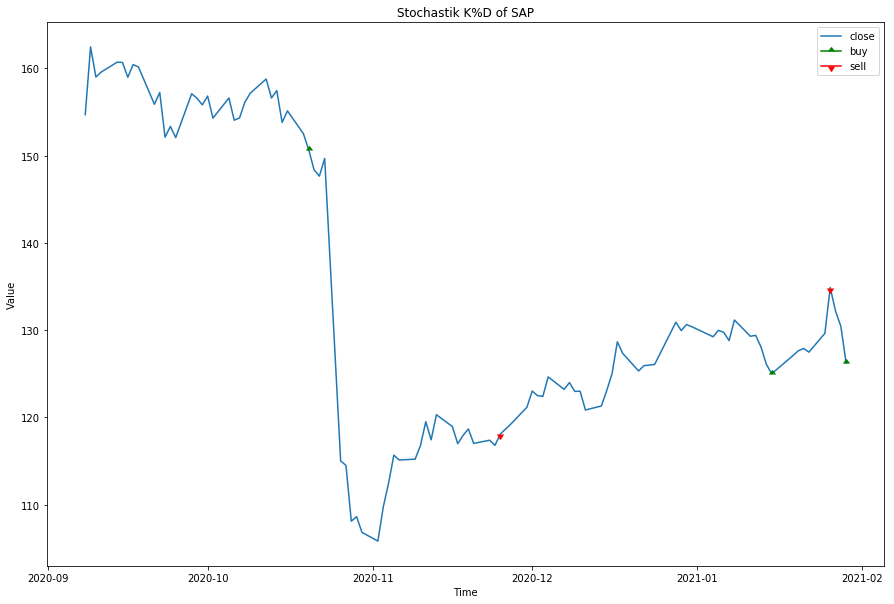

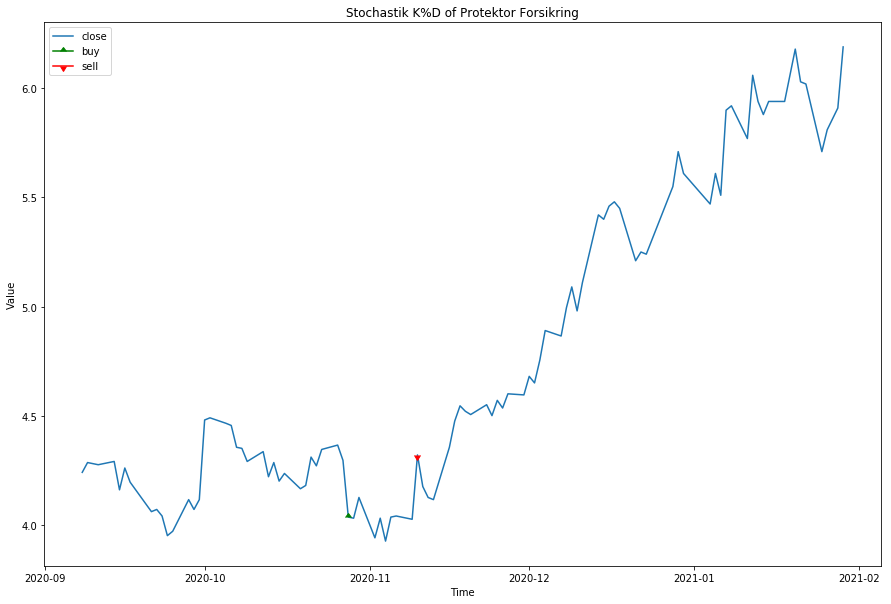

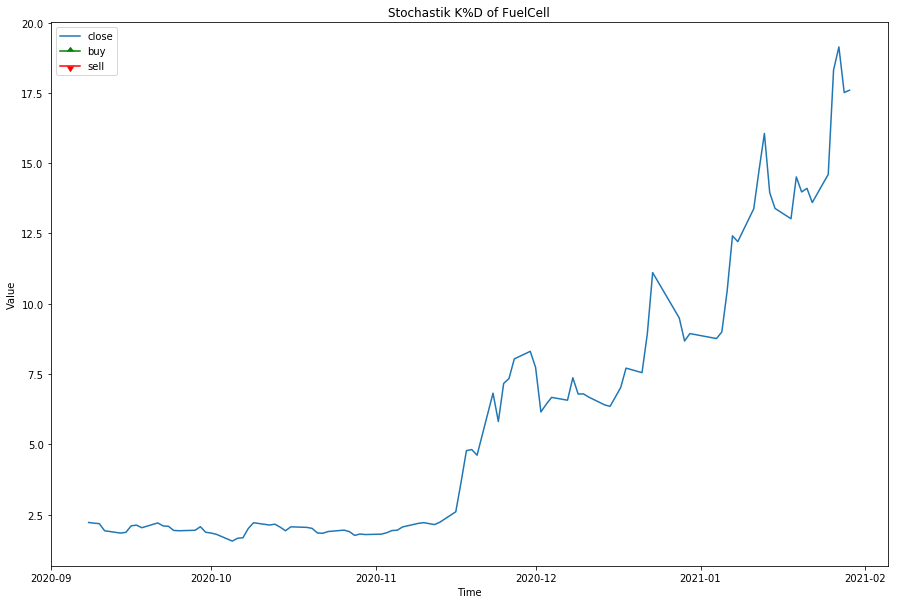

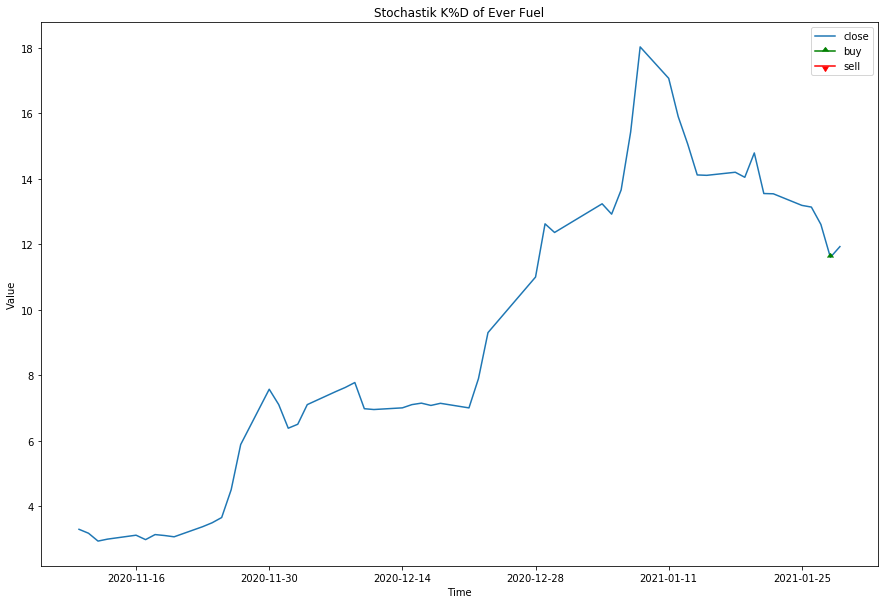

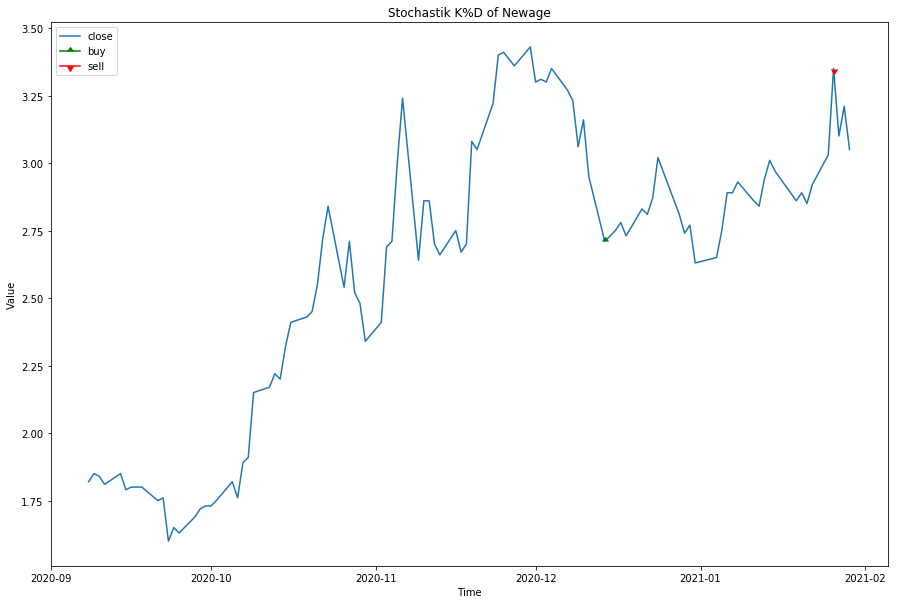

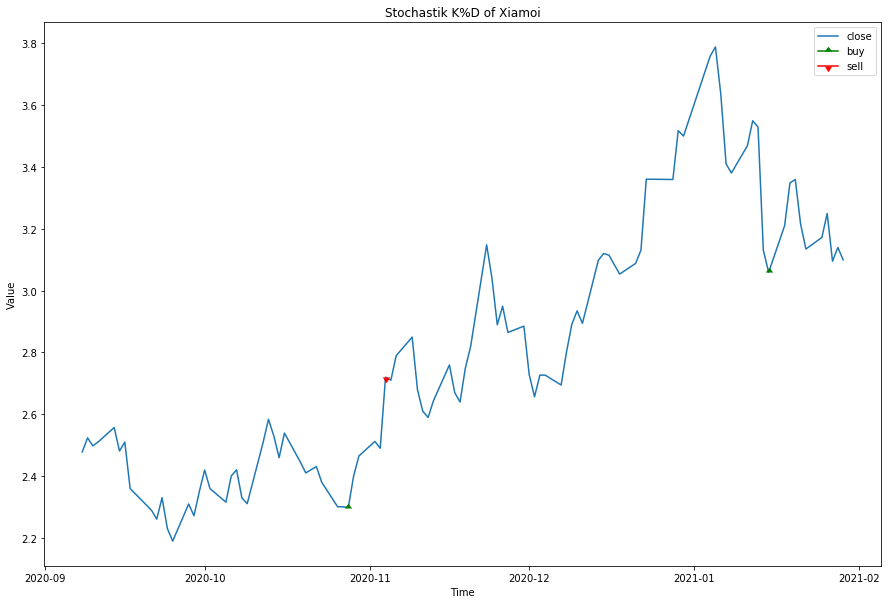

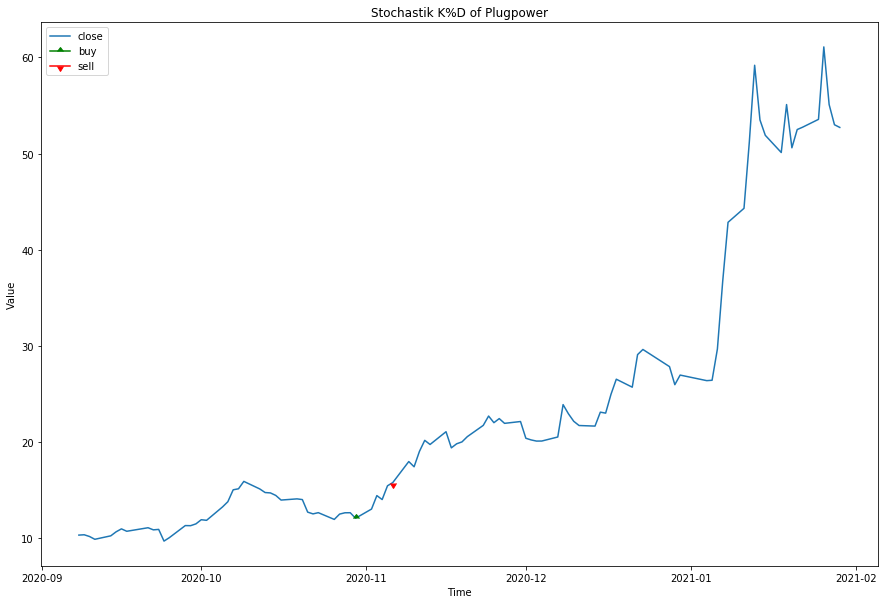

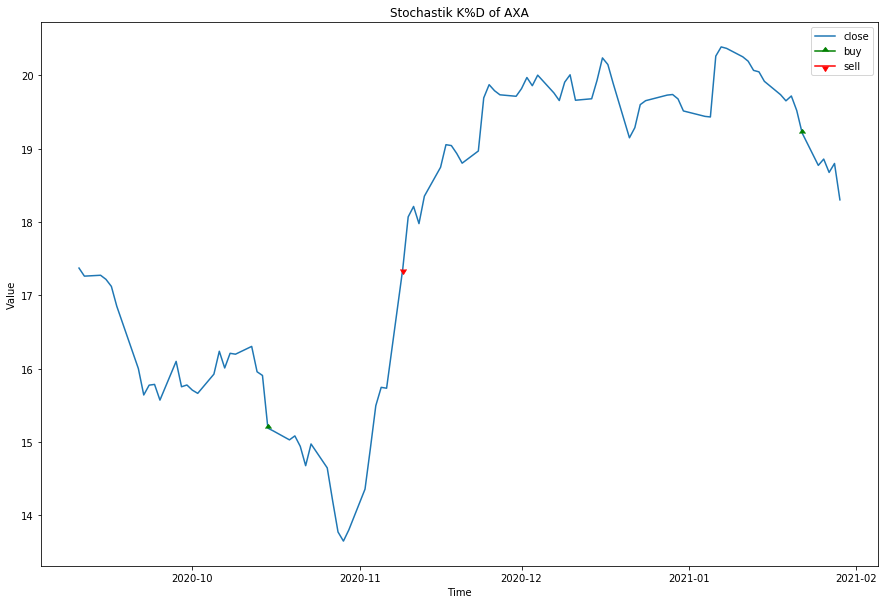

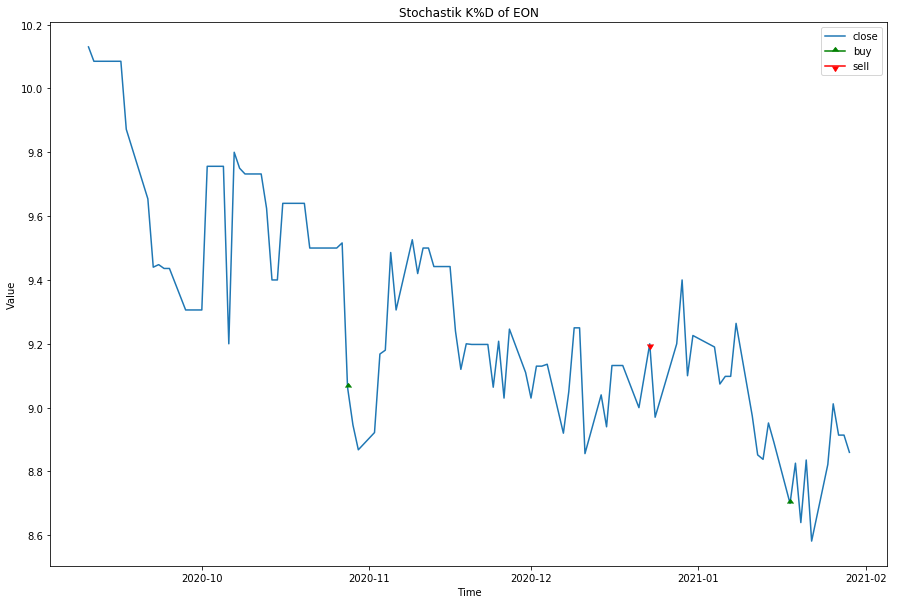

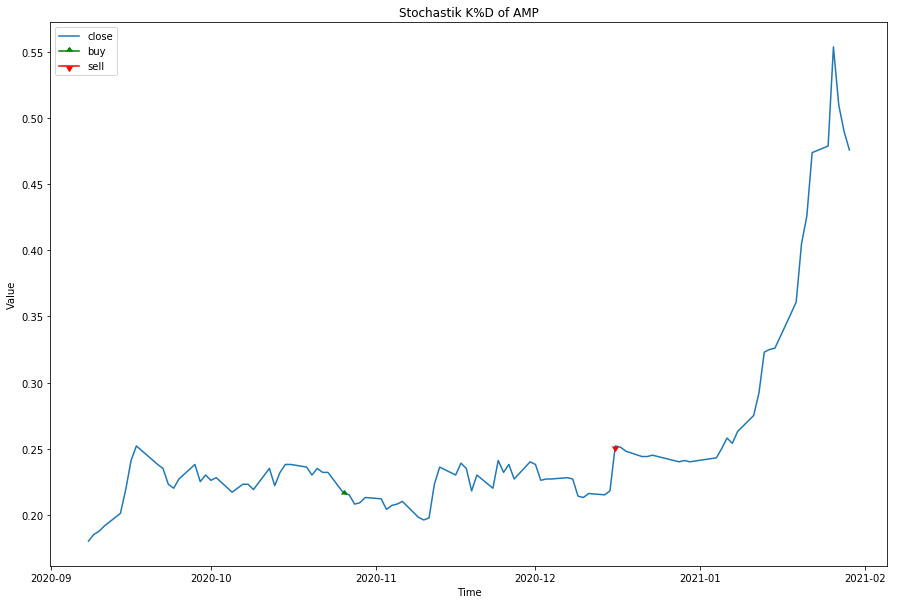

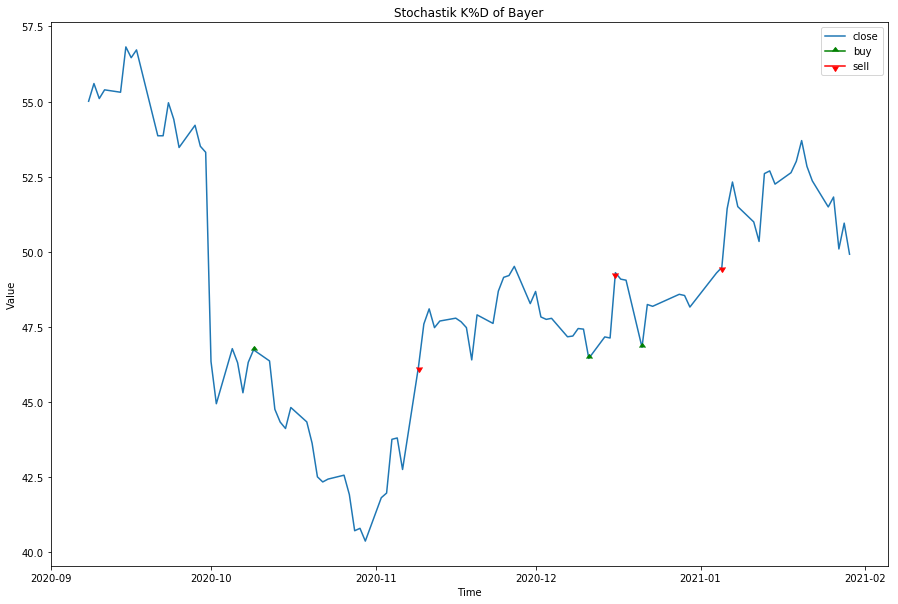

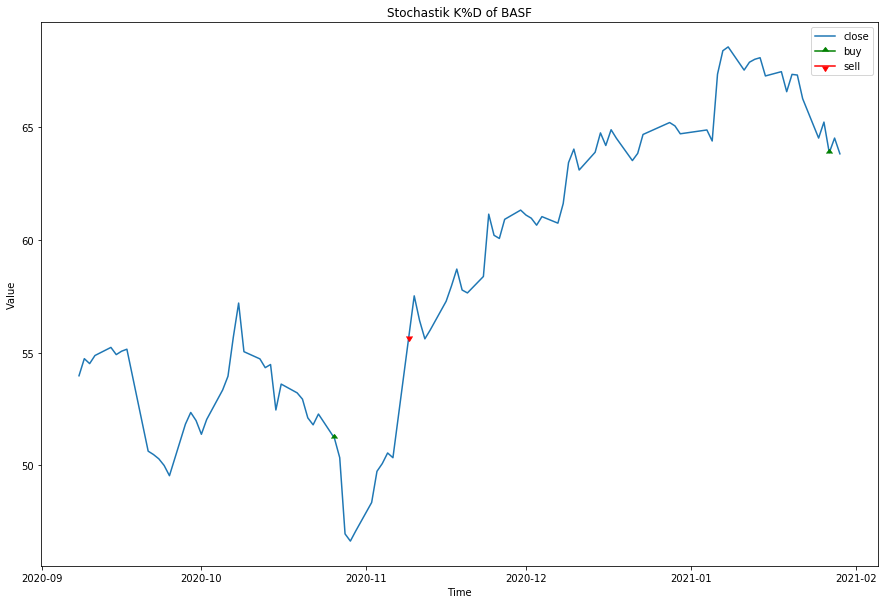

In [350]:
get_smas(stocks, names, 21)
get_rsi(stocks, names, 21)
get_macd(stocks, names, 21)
get_ema(stocks, names, 21)
get_stoch(stocks, names, 21)

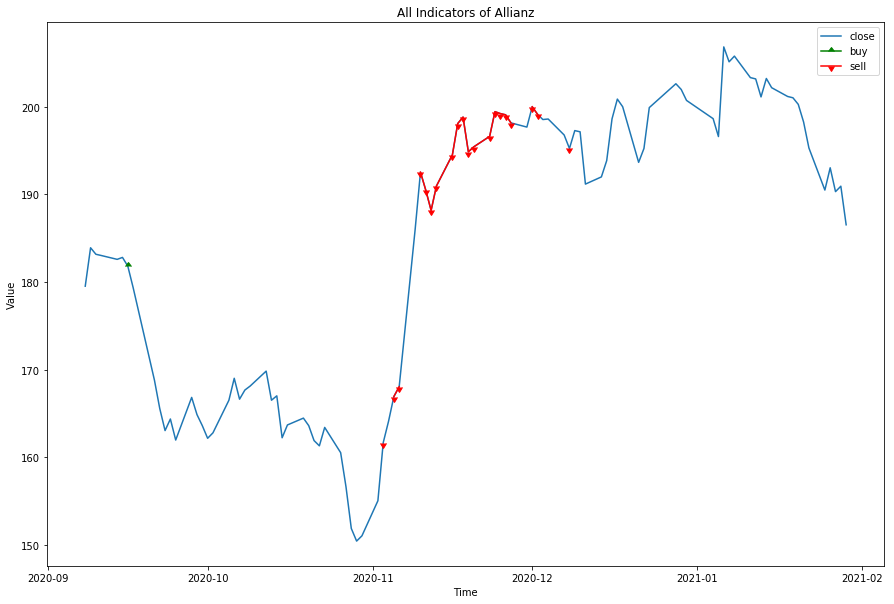

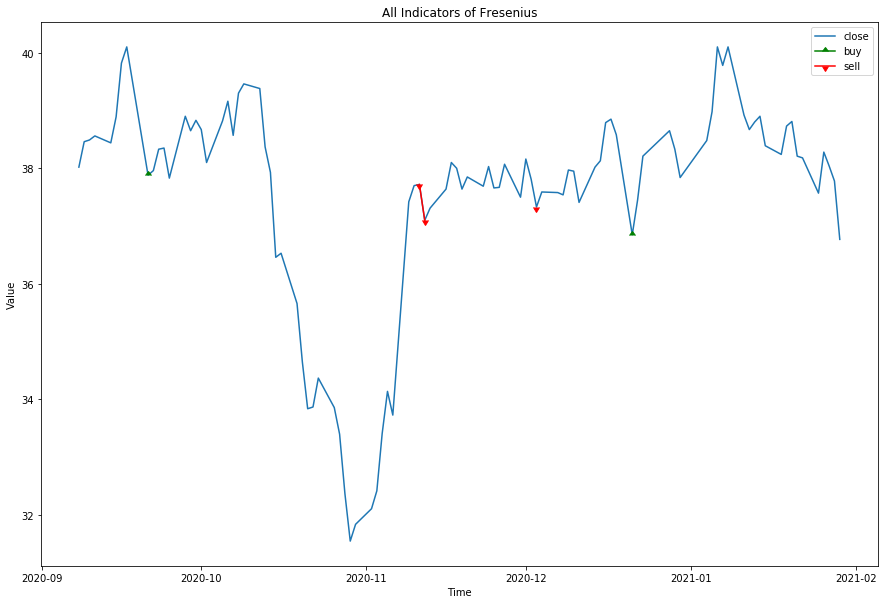

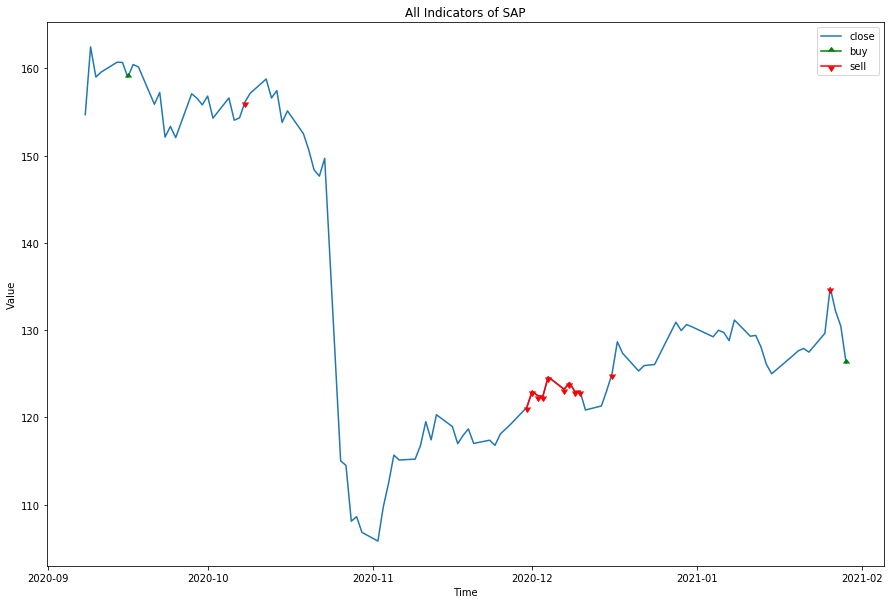

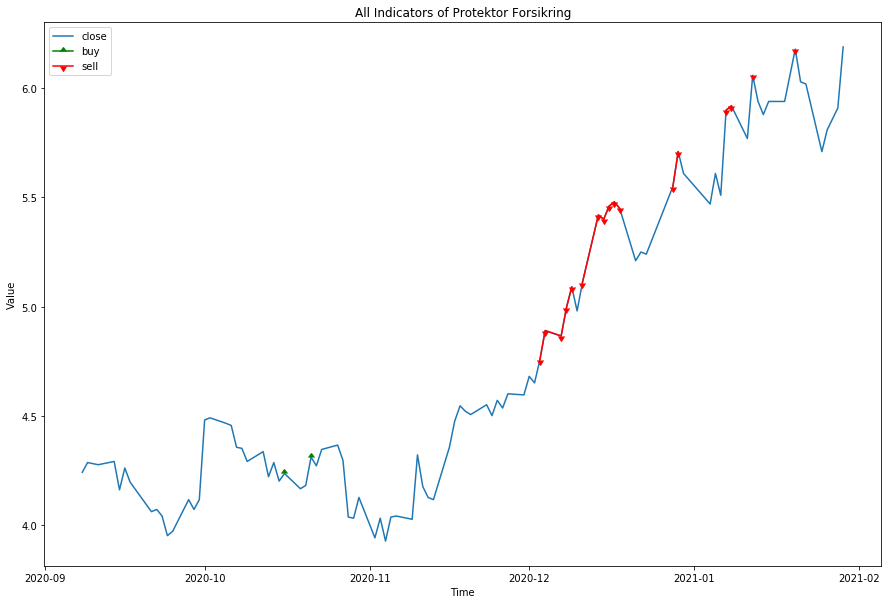

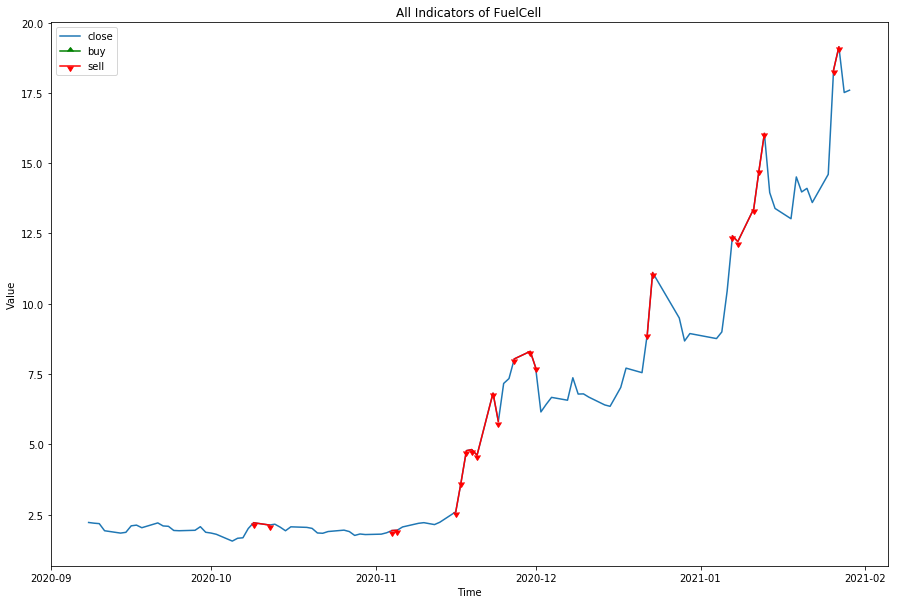

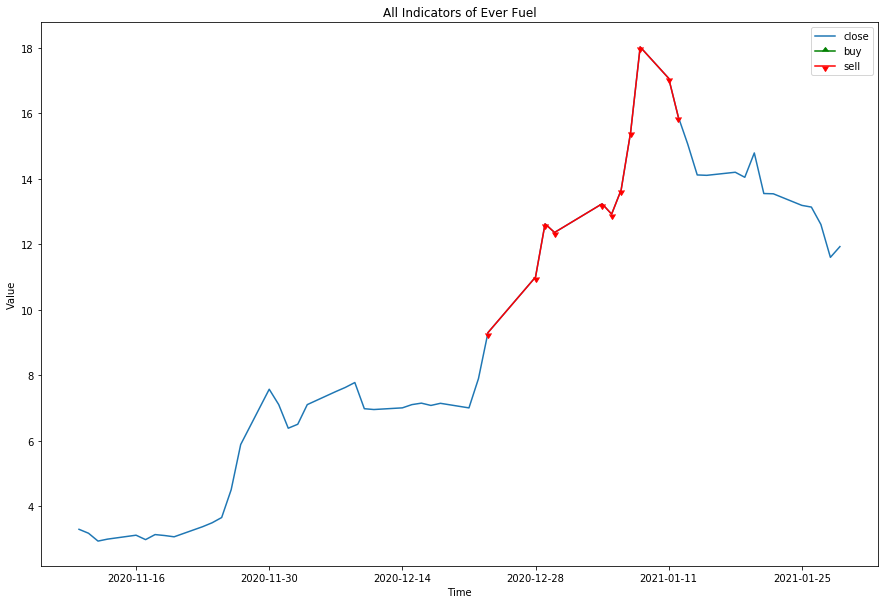

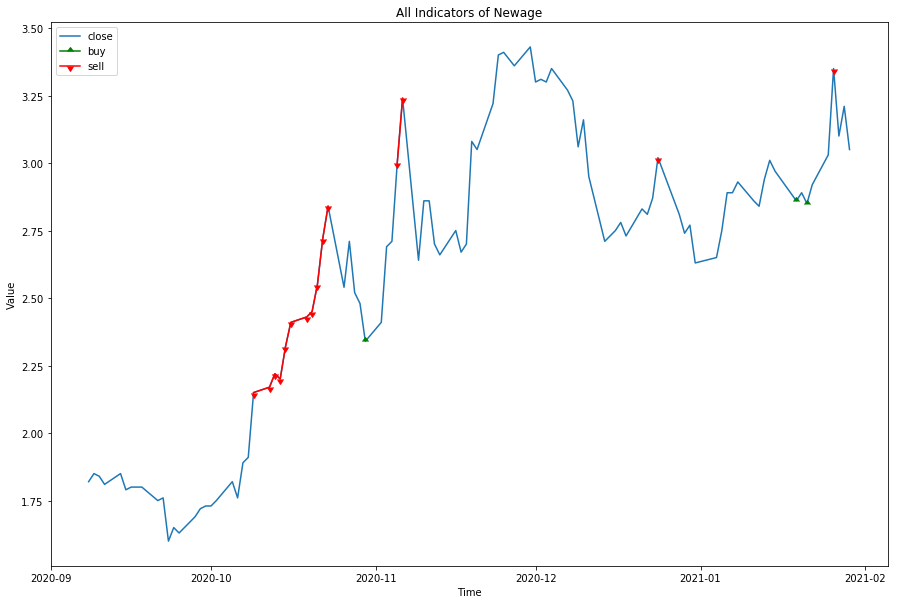

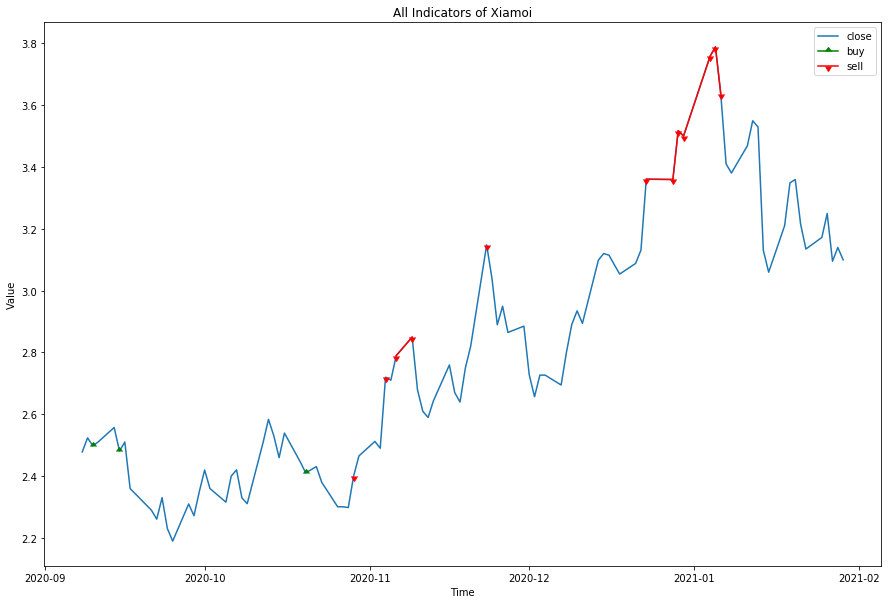

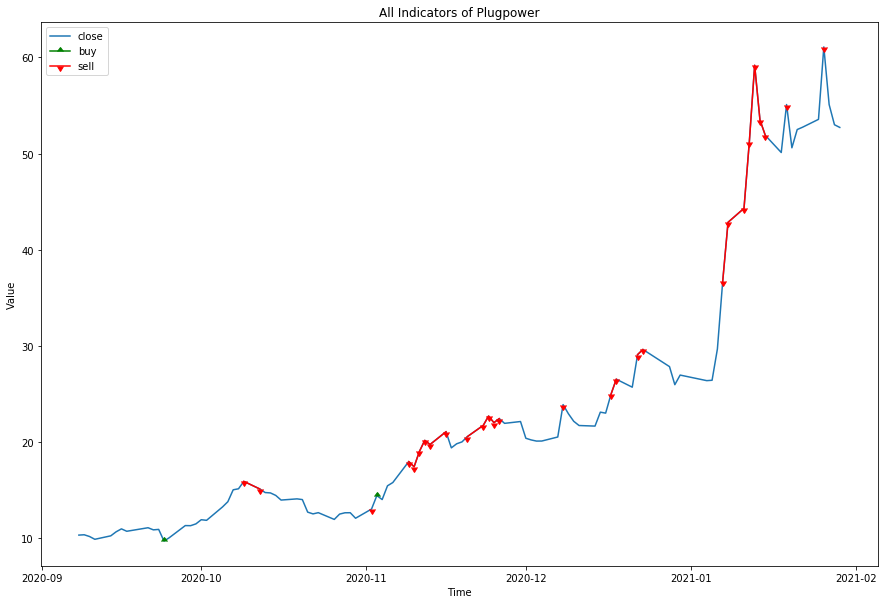

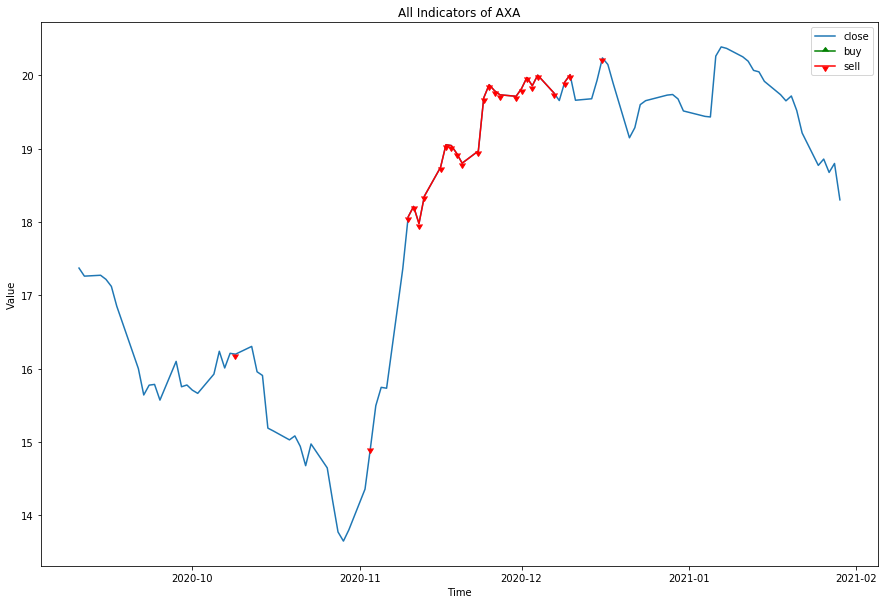

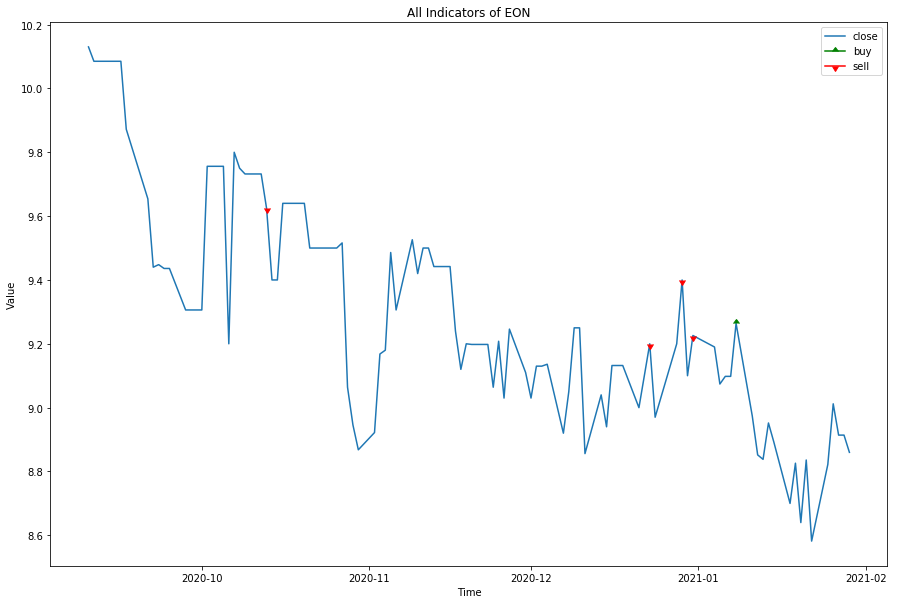

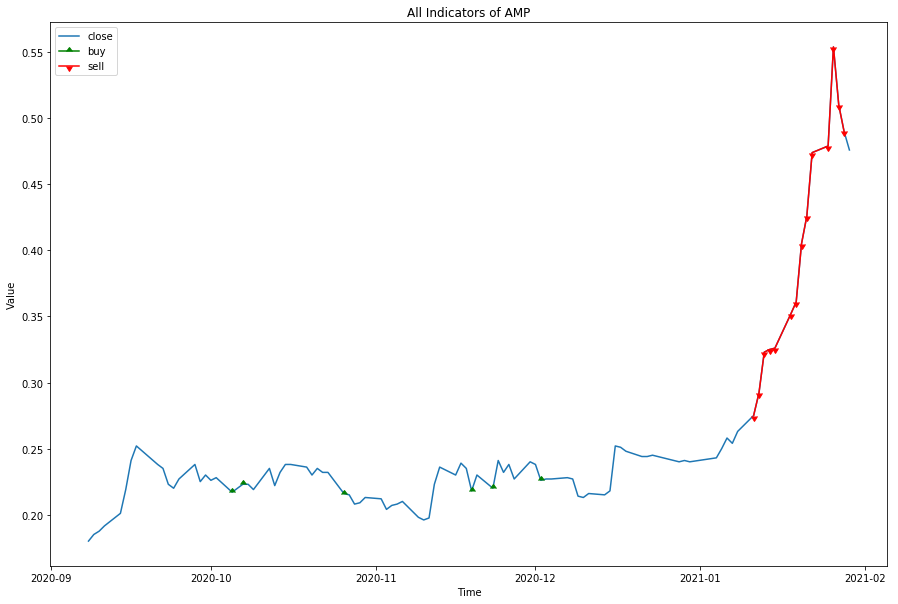

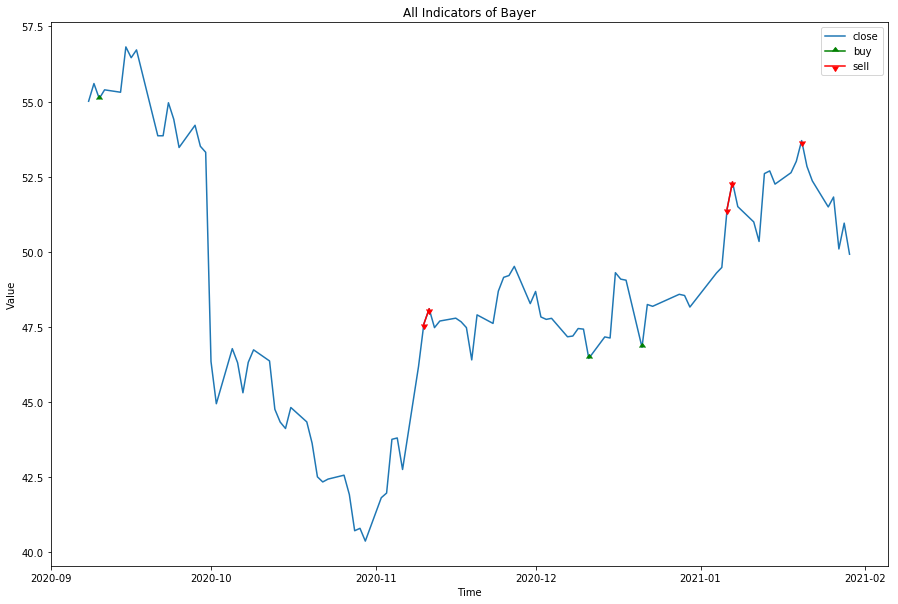

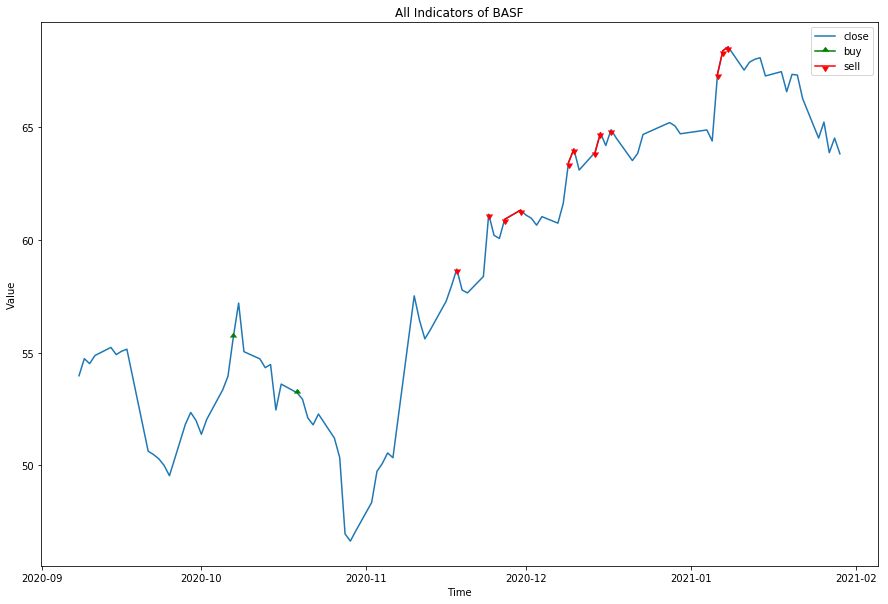

In [351]:
merge(stocks, names)